# Problem Analysis Workshop 1 - Customer satisfication in hotel industry
### Team 7 - Members:
- **Tilvan Madalina**  - Student number: 9058215
- **Wesley Jayavanti** - Student number: 9019852
- **Yun-Chen Wang**    - Student number: 9040873

### <font>Table of contents<font>
- [Project Description](#1-project-description)
- [Project Setup](#2-project-setup)
- [Dataset](#3-dataset)
- [Data Cleansing](#4-data-cleansing)
- [Descriptive Analysis](#5-descriptive-analysis)
  - [Summarize Data](#51-summarize-data)
  - [Visualize Data](#52-visualize-data)

---

# 1. Project
## 1.1 AI prompt

* The role  of preparing good and bad questions in order to analyze the TripAdvisor dataset, when using an AI prompt is extremely significant to derive the correct and useful insights.
* Our objective is to explain the difference between good and bad research questions while analyzing user reviews and ratings. 
Well-researched questions lead to useful data while incorrectly formulated questions hinder analysis and provide irrelevant results. 

### Good Questions are Specific and  have Measurable outcomes

For example: "What is the average rating of hotels in Germany with at least 100 reviews?"
Reason It's Good: This question is specific (Germany hotels) and can be measured (average rating, reviews >= 100)

### Actionable (Provides insights that are useful in decision-making)
Features of a Bad Question :They are general, ambiguous, unfocussed  and difficult to analyze:
Example: "What do people think about hotels?"
Reason It’s Bad: It’s too vague and does not specify which aspect is being analyzed (like cost, location, services) and cannot be answered due to imprecise phrasing.

### Improving Bad Questions
Improved: "Which are the most frequently mentioned positive and negative reviews for 5-star rated hotels?"

### Conclusion
The basis of meaningful data analysis are good questions. Poorly constructed questions waste resources and impede understanding. However, by refining questions, decisions can be greatly improved.


## 1.2 Project Description
<a class='anchor' id='project-description'></a>

## Findings:
[Inside the Rating Scores: A Multilevel Analysis of the Factors Influencing Customer Satisfaction in the Hotel Industry ](https://www.researchgate.net/publication/312164283_Inside_the_Rating_Scores_A_Multilevel_Analysis_of_the_Factors_Influencing_Customer_Satisfaction_in_the_Hotel_Industry) (Radojević, Stanisic & Stanić, 2017)

This research has a multilevel analysis of factors affecting customer satisfaction in hotel industry. Data from TripAdvisor.com, includes 13,410 hotels from 80 major destinations. 
<br> <br>
Relevant factors:
- visitor's nationality
- customer reviews
- country GDP
- Hofstede's variables:

    Shows how a society's culture influences its values, and how those values affect people's behavior.​
    * Power Distance Index (PDI): &emsp; How much people accept unequal power in a society.​
    * Individualism (IDV): &emsp; Shows if people care more about themselves or their group. ​
    * Motivation towards Achievement and Success (MAS): &emsp;Shows if a culture values success and competition (high MAS) or cooperation and quality of life (low MAS). ​
    * Uncertainty Avoidance Index (UAI): &emsp; Shows how much people dislike uncertainty or unknown situations. ​
    * Long-Term Orientation (LTO): &emsp; Shows if people focus on future goals (long-term) or quick results and traditions (short-term). ​
    * Indulgence vs. Restraint (IVR): &emsp; Shows if people enjoy life freely (indulgence) or follow strict rules (restraint).

## Focus:
1. Clarify the definition of customer satisfaction components
2. Use targeted questions addressing specific aspects of consumer experience
3. Rank factors in order of importance: *ex. room cleanliness, staff friendliness, location*
4. Review and refine research questions to match customer preferences changes and industry trends
5. Customer segment base - business vs. leisure travellers
6. Structured feedback - improve specific areas (1-10 scale)
7. Departments aligned with client satisfaction goals

# 2. Project Setup
<a class='anchor' id='project-setup'></a>

In [4]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib_venn import venn3
from scipy.stats import shapiro
from IPython.display import display
from scipy.stats import ttest_ind, norm, f, f_oneway
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa import stattools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 3. Dataset
<a class='anchor' id='dataset'></a>

In [4]:
path = "../dataset/The final data set (uncentered and unscaled variables).csv"
rating_df = pd.read_csv(path)
print(f"rating_df.shape: {rating_df.shape}")
rating_df.head() # print the first 5 rows of the dataset

rating_df.shape: (1048575, 80)


,Visitors_country_name,Destination_country_name,Hotel_id,Reviewer_id,Review_id,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Date_of_review,Trip_type,Reviewer_rank,Hotel.stars,Hotel.price,Hotel.distance,Hotel.noofrooms,Suites,Family.Rooms,Microwave,Air.Conditioning,Minibar,Refrigerator.in.room,Bar.Lounge,Kitchenette,Free.Parking,Self.Serve.Laundry,Business.Centre.with.Internet.Access,Conference.Facilities,Meeting.Rooms,Banquet.Room,Casino.and.Gambling,Babysitting,Dry.Cleaning,Multilingual.Staff,Airport.Transportation,Free.Breakfast,Children.Activities...Kid...Family.Friendly..,Laundry.Service,Concierge,Room.Service,Restaurant,Shuttle.Bus.Service,Free.Internet,Free.High.Speed.Internet...WiFi..,Paid.Wifi,Paid.Internet,Public.Wifi,Ski.In...Ski.Out,Fitness.Centre.with.Gym...Workout.Room,Spa,Tennis.Court,Hot.Tub,Pool,Golf.course,Beach,Wheelchair.access,Reduced.mobility.rooms,Non.Smoking.Hotel,Non.Smoking.Rooms,Smoking.rooms.available,Pets.Allowed...Dog...Pet.Friendly..,Destination_country_GDP,Visitors_country_GDP,Destination_country_pdi,Destination_country_idv,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
0,Afghanistan,Egypt,d302323,BEFE48CEC37A8BAC68FC5471B7D52A68,131620232,59,1,3,2.0,3.0,3.0,3.0,3.0,4.0,6/9/2012,business,Reviewer,5.0,151.0,8.05,409.0,1,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,3314.5,664.8,70,25,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Japan,d1115809,390FEEFF2C67C9ACC376C133F3E5AD9D,223296192,96,1,4,NaN,NaN,NaN,5.0,4.0,5.0,8/21/2014,family,Top Contributor,3.0,94.0,4.99,250.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,38633.7,664.8,54,46,95,92,88,42,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Egypt,d300669,452C85191D400F6C83F249B4990CBD74,254401713,59,1,5,NaN,5.0,NaN,5.0,5.0,NaN,NaN,business,NaN,5.0,181.0,1.13,855.0,1,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,1,3314.5,664.8,70,25,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,United Kingdom,d187989,B112C906DAA206F9F2EA9613526DCD3A,23343685,199,1,4,3.0,5.0,4.0,5.0,NaN,4.0,1/7/2009,solo,Senior Reviewer,5.0,668.0,4.51,214.0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,41781.1,664.8,35,89,66,35,51,69,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Croatia,d601897,17552C71896B64C6EFCC959E1551F412,47403276,49,1,3,5.0,4.0,3.0,5.0,NaN,5.0,10/21/2009,solo,Senior Contributor,NaN,77.0,2.09,49.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13597.9,664.8,73,33,40,80,58,33,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Data Cleansing
<a class='anchor' id='data-cleansing'></a>

The dataset we found contains 75 columns with various data such as country names, IDs, ratings, date of review, facilities and services, and Hoftede's variables. However, there are a few issues that need to be addressed before we can perform an analysis:

1. **Missing values**: Some of the columns have missing data. These need to be handled by either filling in the missing values or removing the corresponding rows.
2. **Duplicate rows**: The data is categorized by the visitor's country to each other country. This creates a lot of duplicates between the other columns that are specific to the visitor's country. We wil have to organize the data so we don't run into too much duplicates.
3. **Incorrect data types**: Some columns may have incorrect data types (e.g., an date column stored as an object instead of a datetime).

In [5]:
# Check for missing values
print(rating_df.isnull().sum())

Visitors_country_name           0
Destination_country_name        0
Hotel_id                        0
Reviewer_id                     0
Review_id                       0
                            ...  
Visitors_country_idv        24428
Visitors_country_mas        24428
Visitors_country_uai        24428
Visitors_country_lto        29408
Visitors_country_ivr        46917
Length: 80, dtype: int64


# 5. Descriptive Analysis
<a class='anchor' id='descriptive-analysis'></a>

## 5.1 Summarize Data
<a class='anchor' id='51-summarize-data'></a>

### Measures of Location (mean, median and mode)

In [6]:
overall_rating = rating_df["Overall_rating"]

# Calculate the mean, median, and mode of Overall Rating
mean_rating = np.mean(overall_rating)
median_rating = np.median(overall_rating)
mode_rating = overall_rating.mode()[0]  # Use [0] to get the first mode in case of multiple modes

# Print the results
print(f"Mean: {round(mean_rating, 2)}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")


Mean: 4.03
Median: 4.0
Mode: 5


### Measures of Dispersion (quartiles , variance, deviation and standard deviation)

In [7]:
# Calculate deviation between each data point
deviations = overall_rating - mean_rating

# Create output file with deviations because we have over 1 million data entries
_output_path = "../output/overall_rating_deviations.csv"
os.makedirs(os.path.dirname(_output_path), exist_ok=True)
deviations.to_csv(_output_path) 

# Calculate variance and standard deviation
variance = np.var(overall_rating)
std_dev = np.std(overall_rating)

# Calculate quartiles
quartiles = overall_rating.quantile([0.0, 0.25, 0.5, 0.75, 1.0])
df_quartiles = pd.DataFrame({
    'Quartile': quartiles.index,
    'Value': quartiles.values                      
})
# Format the 'Quartile' column to show as percentages (e.g., 25% instead of 0.25)
df_quartiles['Quartile'] = df_quartiles['Quartile'].apply(lambda x: f'{int(x*100)}%')
df_quartiles.loc[df_quartiles['Quartile'] == '0%', 'Quartile'] = "Min"
df_quartiles.loc[df_quartiles['Quartile'] == '100%', 'Quartile'] = "Max"


# Print the results
print(f"Deviations: {round(deviations,2)}")
print()
print(f"Variance: {round(variance,2)}")
print(f"Standard Deviation: {round(std_dev,2)}")
print("Quartiles:")
print(df_quartiles)

Deviations: 0         -1.03
1         -0.03
2          0.97
3         -0.03
4         -1.03
           ... 
1048570   -0.03
1048571   -1.03
1048572   -3.03
1048573   -0.03
1048574    0.97
Name: Overall_rating, Length: 1048575, dtype: float64

Variance: 1.06
Standard Deviation: 1.03
Quartiles:
  Quartile  Value
0      Min    1.0
1      25%    4.0
2      50%    4.0
3      75%    5.0
4      Max    5.0


### Print summary statistics for meaningful columns

In [8]:
# Print summary statistics for meaningful columns
selected_columns =["Overall_rating",
                   "Location_rating",
                   "Cleanliness_rating",
                   "Rooms_rating",
                   "Service_rating",
                   "Sleepquality_rating",
                   "Value_rating",
                   "Hotel.stars",
                   "Hotel.price",
                   "Hotel.distance",
                   "Hotel.noofrooms",
                   "Destination_country_GDP",
                   "Destination_country_pdi",
                   "Destination_country_idv",
                   "Destination_country_mas",
                   "Destination_country_uai",
                   "Destination_country_lto",
                   "Destination_country_ivr"
                   ] # [1048575 rows x 19 columns]
rating_df_stat = rating_df[selected_columns]

# Add variance and IQR to summary statistics
summary_stats = rating_df_stat.describe().transpose()
summary_stats["variance"] = np.var(rating_df_stat)
summary_stats["IQR"] = rating_df_stat.quantile(0.75) - rating_df_stat.quantile(0.25)

print(summary_stats)


c:\Users\Madalina\OneDrive - Conestoga College\Conestoga\January-April\Data Analysis Mathematics, Algorithms and Modelling\Project\DA_Proj_G7\venv_311\Lib\site-packages\numpy\_core\fromnumeric.py:4316: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


                             count          mean  ...      variance      IQR
Overall_rating           1048575.0      4.025749  ...  1.058182e+00      1.0
Location_rating           819447.0      4.353338  ...  7.415681e-01      1.0
Cleanliness_rating        848016.0      4.269430  ...  9.228710e-01      1.0
Rooms_rating              793224.0      3.961217  ...  1.111077e+00      2.0
Service_rating            955350.0      4.113741  ...  1.133895e+00      1.0
Sleepquality_rating       734851.0      4.150196  ...  1.031143e+00      1.0
Value_rating              849685.0      3.965704  ...  1.125904e+00      2.0
Hotel.stars              1025737.0      3.771034  ...  6.614461e-01      1.0
Hotel.price               966015.0    163.721692  ...  1.218929e+04    118.0
Hotel.distance           1029802.0      3.589292  ...  2.770574e+01      3.7
Hotel.noofrooms          1044163.0    213.389806  ...  5.802805e+04    237.0
Destination_country_GDP  1042020.0  30479.168361  ...  3.641515e+08  32765.9

## 5.2 Visualize Data
<a class='anchor' id='52-visualize-data'></a>

### 5.2.1 Box-Whisker Plot
Compare both Box-Whisker Plot and the histogram, to show the overall ratings

In [9]:
# text_str = f"Mean: {mean_val}\nMedian: {median_val}\nMode: {mode_val}\nQ1: {Q1}\nQ3: {Q3}\nIQR: {IQR}"
# ax.text(3.2, 1.15, text_str, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

<class 'pandas.core.series.Series'>
Mean: 4.03
Median: 4.0
Mode: 5
Q1: 4.0,
Q3: 5.0,
IQR: 1.0;


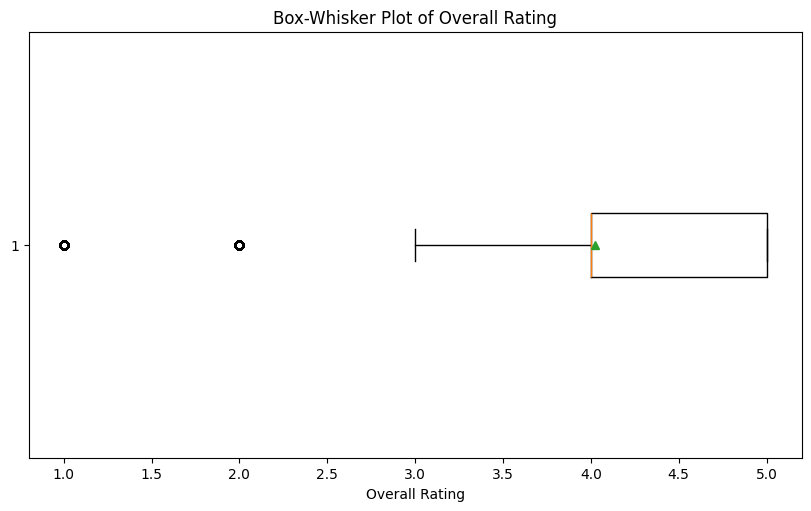

In [10]:
# Print info
print(type(overall_rating))
print(f"Mean: {round(np.mean(overall_rating), 2)}")
print(f"Median: {np.median(overall_rating)}")
print(f"Mode: {overall_rating.mode()[0]}")
Q1 = np.percentile(overall_rating, 25)  # (25th percentile)
Q3 = np.percentile(overall_rating, 75)  # (75th percentile)
IQR = Q3 - Q1
print(f"Q1: {Q1},\nQ3: {Q3},\nIQR: {IQR};")

# Box-Whisker Plot
fig, ax = plt.subplots(figsize=(8, 5), layout="constrained")
plt.boxplot(overall_rating, showmeans=True, vert=False)
ax.set_title('Box-Whisker Plot of Overall Rating')
ax.set_xlabel('Overall Rating')
plt.show()


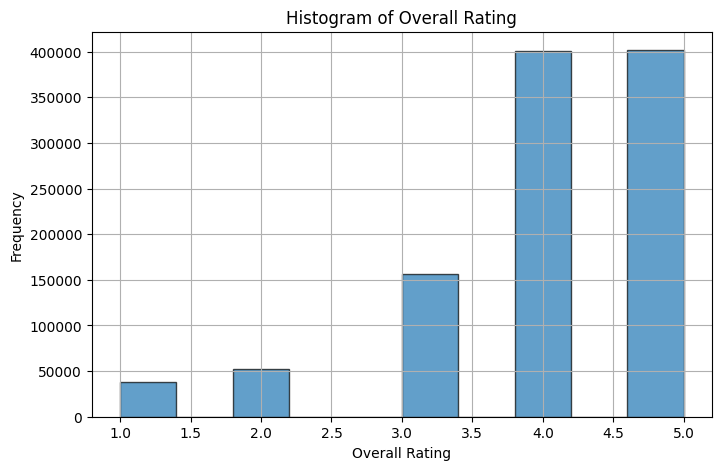

Variance: 1.06
Standard Deviation: 1.03
Quartiles:
  Quartile  Value
0      Min    1.0
1      25%    4.0
2      50%    4.0
3      75%    5.0
4      Max    5.0


In [11]:
# Histogram of Overall Rating
plt.figure(figsize=(8, 5))
overall_rating.hist(bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

print(f"Variance: {round(variance,2)}")
print(f"Standard Deviation: {round(std_dev,2)}")
print("Quartiles:")
print(df_quartiles)

### 5.2.2 Scatter Plot

C:\Users\Madalina\AppData\Local\Temp\ipykernel_14104\4154795796.py:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ticks = pd.date_range(start='2002-01-01', end='2016-01-01', freq='2Y')


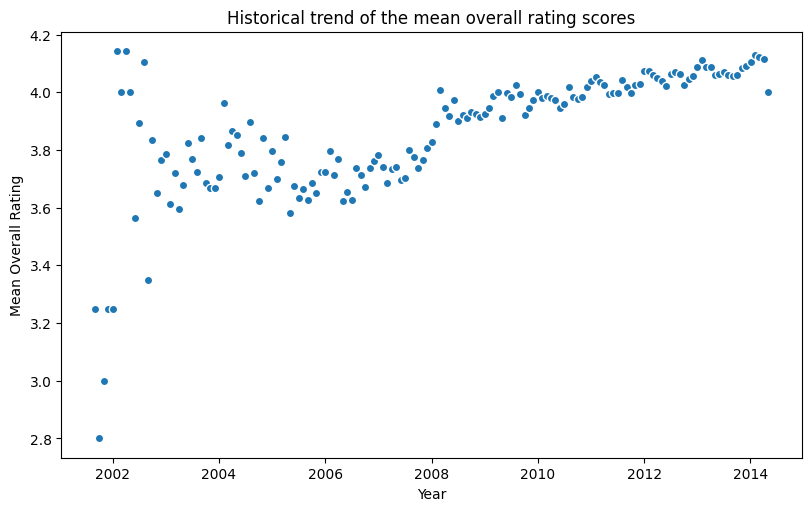

In [12]:
# Change the date column to be of type datetime
review_date = pd.to_datetime(rating_df['Date_of_review'])

# Extract the year from the review_date column
review_year_month = review_date.dt.to_period('M')

# Group by year and calculate the mean overall rating
mean_ratings_monthly = rating_df.groupby(review_year_month)['Overall_rating'].mean()
mean_ratings_monthly.index = mean_ratings_monthly.index.to_timestamp()

# Scatter Plot
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.scatter(mean_ratings_monthly.index, mean_ratings_monthly.values, edgecolors='white')
ax.set_title('Historical trend of the mean overall rating scores')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Overall Rating')

# Show ticks from 2002 to 2016 with an interval of 2 years
ticks = pd.date_range(start='2002-01-01', end='2016-01-01', freq='2Y')
plt.xticks(ticks, labels=[tick.strftime('%Y') for tick in ticks])

plt.show()

### 5.2.3 Histogram

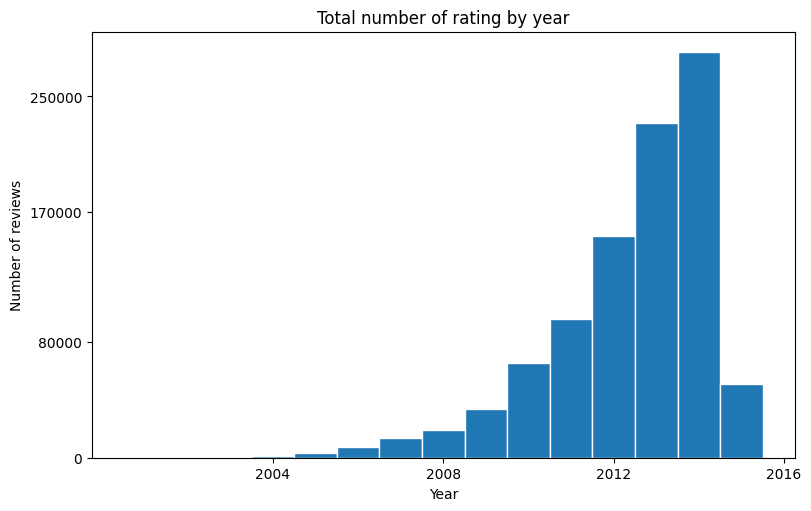

In [13]:
# Extract the year from the review_date column
review_year = review_date.dt.year

# Histogram
fig, ax = plt.subplots(figsize=(8, 5), layout="constrained")
ax.hist(review_year, bins=range(2001, 2017), edgecolor='white', align='left')
ax.set_title('Total number of rating by year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of reviews')

# Set x-axis and y-axis tick marks and labels
x_ticks = np.linspace(2004, 2016, 4)
plt.xticks(x_ticks)

y_ticks = np.linspace(0, 250000, 4)
y_ticks = [round(tick, -4) for tick in y_ticks] # round to the nearest tens of thousands (4 zeros)
plt.yticks(y_ticks)

plt.show()

### 5.2.4 Venn Diagram

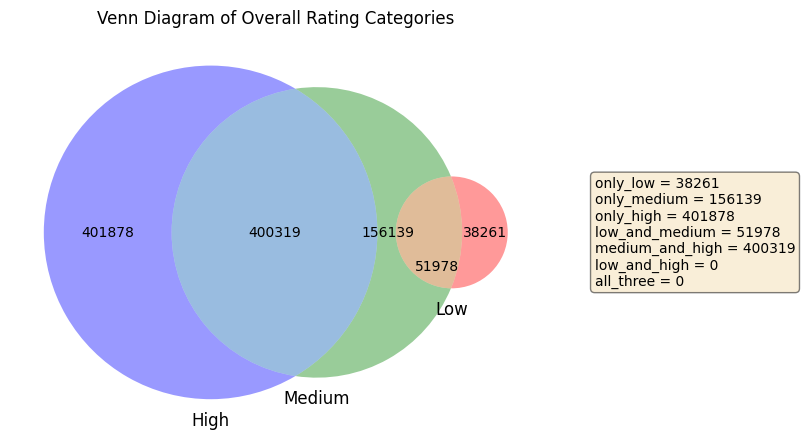

In [14]:
# Define rating categories (for example, Low, Medium, High ratings)
low = set(overall_rating[overall_rating <= 2.0].index)
medium = set(overall_rating[(overall_rating >= 2.0) & (overall_rating <= 4)].index)
high = set(overall_rating[overall_rating >= 4].index)

# Calculate the sizes of all 7 regions in the Venn diagram
only_low = len(low - medium - high)
only_medium = len(medium - low - high)
only_high = len(high - low - medium)
low_and_medium = len(low & medium - high)
medium_and_high = len(medium & high - low)
low_and_high = len(low & high - medium)
all_three = len(low & medium & high)

# Venn Diagram
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
venn = venn3(subsets=(only_low, only_medium, low_and_medium, only_high, low_and_high, medium_and_high, all_three), set_labels=('Low', 'Medium', 'High'))
venn.get_label_by_id('110').set_position((0.5, -0.1)) # Adjust label positions "low_and_medium"

# Add a legend box with the counts
text = (f"only_low = {only_low}\n"
        f"only_medium = {only_medium}\n"
        f"only_high = {only_high}\n"
        f"low_and_medium = {low_and_medium}\n"
        f"medium_and_high = {medium_and_high}\n"
        f"low_and_high = {low_and_high}\n"
        f"all_three = {all_three}")

# Add text box to the figure
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.1, 0.5, text, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

plt.title('Venn Diagram of Overall Rating Categories')
plt.show()

# 6. Study the normality of features

## 6.1 Study the normality of features using visualization methods (Histogram and density plot, Q-Q plot)

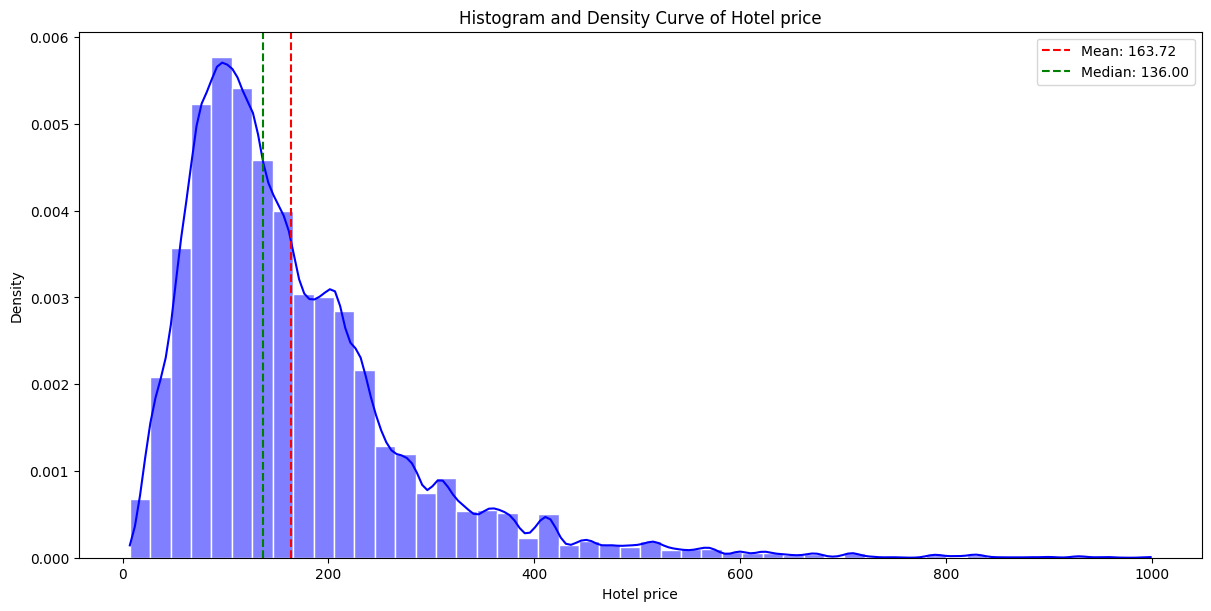

In [15]:
# Histogram and Density Plot
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
hotel_price = rating_df['Hotel.price']

sns.histplot(hotel_price, kde=True, bins=50, color='blue', edgecolor='white', stat='density')
ax.set_title('Histogram and Density Curve of Hotel price')
ax.set_xlabel('Hotel price')
ax.set_ylabel('Density')
ax.axvline(hotel_price.mean(), color='red', linestyle='dashed', label=f"Mean: {hotel_price.mean():.2f}")
ax.axvline(hotel_price.median(), color='green', linestyle='dashed', label=f"Median: {hotel_price.median():.2f}")
ax.legend()
plt.show()

The histogram of `Hotel.price` shows a **right-skewed distribution**, indicating that most hotel prices are concentrated towards the **lower end** (near 0), with relatively few hotels having **higher prices**. This suggests that most hotels in the dataset are budget-friendly, and there are a few expensive hotels or outliers influencing the higher end of the price range.

The density curve is quite **bumpy**, suggesting that there may be **outliers or irregularities in the data**, which can distort the smoothness of the distribution.

The density on the y-axis represents the frequency of hotel prices in the dataset. Given that the histogram is not very tall (ranging from 0 to 0.005 on the y-axis), this suggests that while most hotel prices are concentrated toward the lower end, they are spread out and not concentrated in a small range.

To address the right skew and a bumpy density curve, one solution is to apply a square root transformation to the `Hotel.price` column. This transformation will compress the high values and reduce the influence of outliers, making the distribution smoother and potentially more normally distributed.

In [16]:
# clean the data by removing missing values and using log transformation
clean_rating_df = rating_df.dropna()
hotel_price_log = np.log(clean_rating_df['Hotel.price'])
hotel_price_sqrt = np.sqrt(clean_rating_df['Hotel.price'])

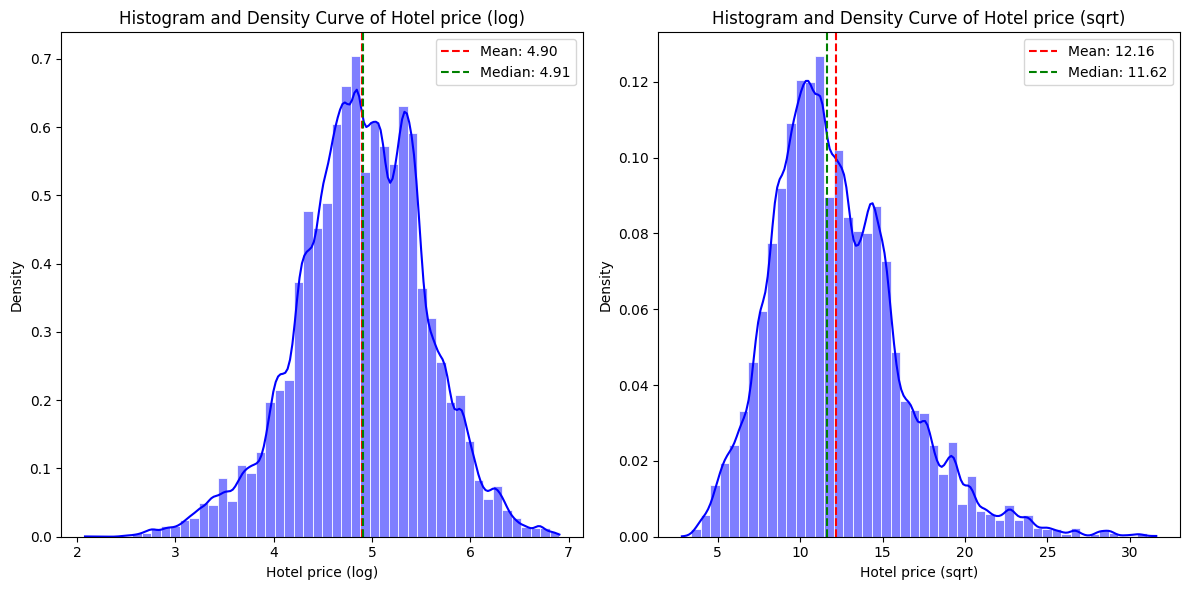

In [17]:
# replot the histogram and density plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

columns = [hotel_price_log, hotel_price_sqrt]

for i, col in enumerate(columns):
    sns.histplot(col, kde=True, bins=50, color='blue', edgecolor='white', stat='density', ax=ax[i])

    if i == 0:
        col_name = 'Hotel price (log)'
    else: 
        col_name = 'Hotel price (sqrt)'

    ax[i].set_title(f'Histogram and Density Curve of {col_name}')
    ax[i].set_xlabel(col_name)
    ax[i].set_ylabel('Density')
    ax[i].axvline(col.mean(), color='red', linestyle='dashed', label=f"Mean: {col.mean():.2f}")
    ax[i].axvline(col.median(), color='green', linestyle='dashed', label=f"Median: {col.median():.2f}")
    ax[i].legend()

plt.tight_layout()
plt.show()

Both the log and square root transformations show some improvement in the distribution, reducing the extreme skewness seen in the original data. The data is now more balanced, with less pronounced skew toward one side (though the square root transformation still exhibits a slight skew). However, the density curve remains relatively unchanged, still showing noticeable bumps along the distribution, indicating that there are likely still some irregularities or outliers present in the data.

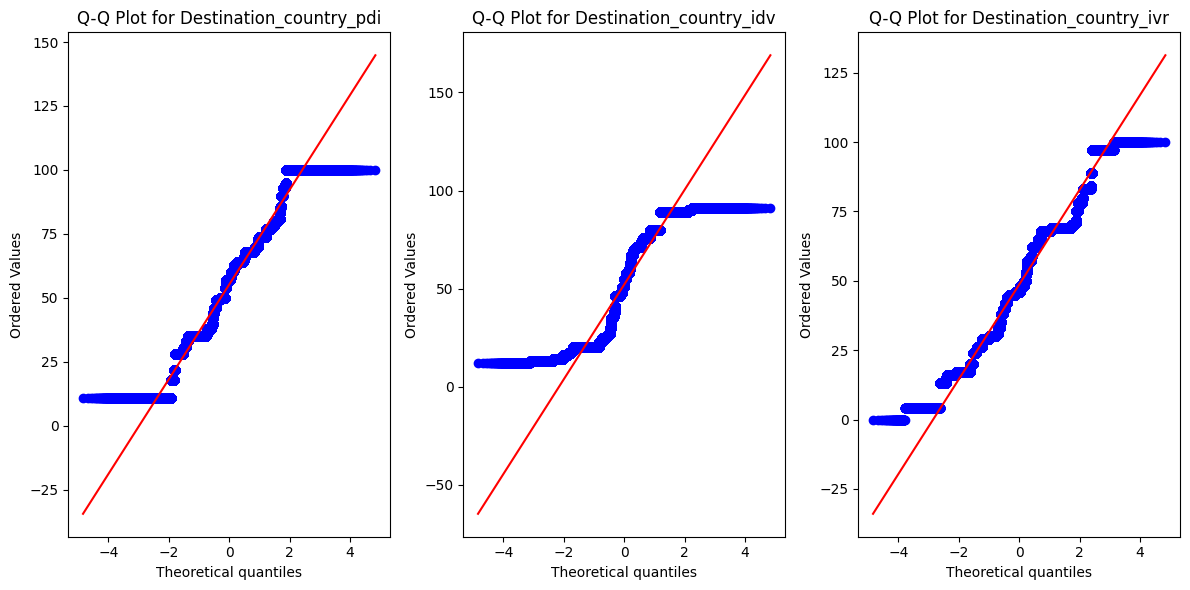

In [18]:
# Q-Q Plot for Hoftedes variables
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

columns = ['Destination_country_pdi', 'Destination_country_idv', 'Destination_country_ivr']

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    stats.probplot(rating_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')

plt.tight_layout()
plt.show()

Hofstede's Dimensions:
- **PDI (Power Distance Index)**: Measures how much people accept unequal power in a society.
- **IDV (Individualism)**: Represents the degree to which individuals are integrated into groups.
- **IVR (Indulgence vs. Restraint)**: Shows the degree to which a society allows people to enjoy life freely (indulgence) or follow strict rules (restraint).

For all three variables, we observe that the central part of the distribution (middle section of the plot) is fairly close to the straight line, which indicates that the central part of the data follows a normal distribution. However, there are deviations at both ends of the plot that suggest that the extremes (both low and high values) do not match the normal distribution. These deviations imply that there are outliers or skewness at the extremes, causing the data to diverge from normality.

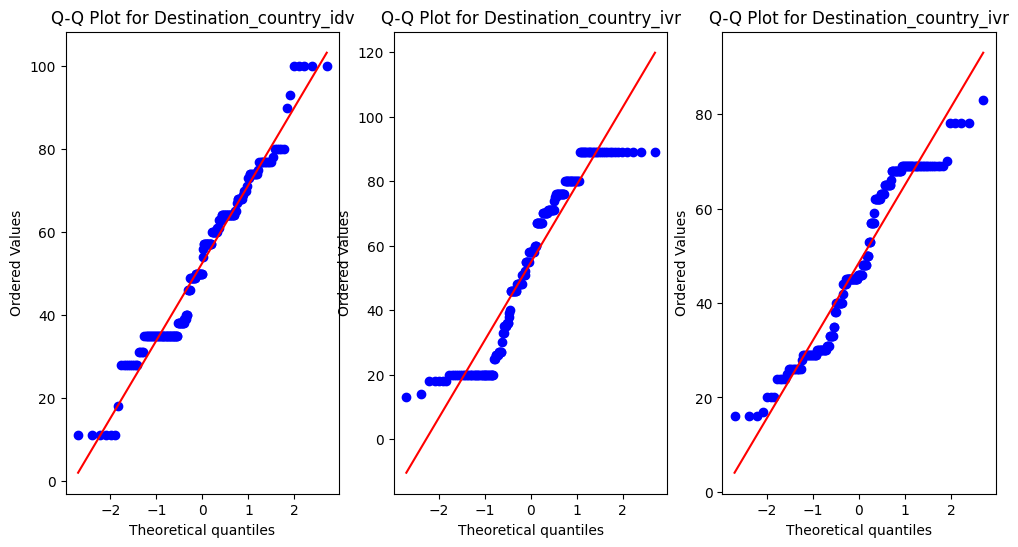

In [19]:
## Q-Q Plot for a sample of 200 data points
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

sample_pdi = clean_rating_df['Destination_country_pdi'].sample(200, random_state=42)
sample_idv = clean_rating_df['Destination_country_idv'].sample(200, random_state=42)
sample_ivr = clean_rating_df['Destination_country_ivr'].sample(200, random_state=42)

columns_sample = [sample_pdi, sample_idv, sample_ivr]

for i, col in enumerate(columns_sample, 1):
    if i==0:
        col_name = 'Destination_country_pdi'
    elif i==1:
        col_name = 'Destination_country_idv'
    else:
        col_name = 'Destination_country_ivr'

    plt.subplot(1, 3, i)
    stats.probplot(col, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col_name}')


## 6.2 Study the normality of features using the Shapiro test
Shapiro-Wilk: checking the p-value for all numeric columns

In [20]:
"""
We define a Shapiro_Func to work on whole numeric culumns of the dataset.
"""
def Shapiro_Func(_data, _output="../dataset/"):
    os.makedirs(os.path.dirname(_output), exist_ok=True)

    # Perform Shapiro-Wilk test on each column and store results
    shapiro_results = {}
    shapiro_results_numeric = {} # Only shows the numeric datatype
    normal_columns = {}  # Dictionary to store columns that may follow normal distribution

    for column in _data.columns:
        try:
            # Exclude non-numeric columns
            if _data[column][0].dtype in ['float64', 'int64']: # Drop non-numeric columns
                stat, p_value = shapiro(_data[column].dropna())  # Drop NaN values for test
                shapiro_results[column] = {"W-Statistic": stat, "p-Value": p_value}
                shapiro_results_numeric[column] = {"W-Statistic": stat, "p-Value": p_value}
                if p_value>0.05:
                    normal_columns[column] = {"W-Statistic": stat, "p-Value": p_value}
                    print(f"    {column} appears to be normally distributed (p > 0.05)\n")
                # else:
                    # print(f"    {column} does NOT appear to be normally distributed (p ≤ 0.05)\n")
        except Exception as e:
            shapiro_results[column] = {"Error": str(e)}

    # Convert results to a DataFrame for better readability
    shapiro_results_df = pd.DataFrame(shapiro_results).T
    normal_columns_df = pd.DataFrame(normal_columns).T
    shapiro_results_numeric_df = pd.DataFrame(shapiro_results_numeric).T

    # Set pandas options to display all rows and columns
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns

    # Display results in Jupyter Notebook cell as a table
    print("Shapiro-Wilk test results:")
    display(shapiro_results_numeric_df)
    print("Normal columns results:")
    display(normal_columns_df)

    # Save the results to a CSV file for review
    _path = _output+'shapiro_test_results.csv'
    shapiro_results_df.to_csv(_path)
    print(f"Shapiro-Wilk test results have been saved to: {_path}")

    _path = _output+'normal_columns.csv'
    normal_columns_df.to_csv(_path)
    print(f"Columns that may follow normal distribution have been saved to: {_path}")

### 6.2.1 Run Shapiro test with whole dataset

In [21]:
path = "../dataset/The final data set (uncentered and unscaled variables).csv"
data = pd.read_csv(path)
print(f"Shape of dataset: {data.shape}")
Shapiro_Func(_data=data, _output="../output/whole/")

Shape of dataset: (1048575, 80)


c:\Users\Madalina\OneDrive - Conestoga College\Conestoga\January-April\Data Analysis Mathematics, Algorithms and Modelling\Project\DA_Proj_G7\venv_311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1048575.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Madalina\OneDrive - Conestoga College\Conestoga\January-April\Data Analysis Mathematics, Algorithms and Modelling\Project\DA_Proj_G7\venv_311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 819447.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Madalina\OneDrive - Conestoga College\Conestoga\January-April\Data Analysis Mathematics, Algorithms and Modelling\Project\DA_Proj_G7\venv_311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accur

Shapiro-Wilk test results:


,W-Statistic,p-Value
Review_id,0.964771,1.518169e-122
Destination_country_id,0.918580,4.052288e-148
Visitors_country_id,0.890394,8.765746e-158
Overall_rating,0.810373,2.039025e-176
Location_rating,0.734025,7.083772e-185
Cleanliness_rating,0.740414,1.581752e-184
Rooms_rating,0.830125,1.063133e-168
Service_rating,0.778926,1.507273e-180
Sleepquality_rating,0.777604,7.610363e-177
Value_rating,0.825357,1.171596e-170


Normal columns results:


""


Shapiro-Wilk test results have been saved to: ../output/whole/shapiro_test_results.csv
Columns that may follow normal distribution have been saved to: ../output/whole/normal_columns.csv


#### scipy.stats.shapiro
> "For N > 5000 the W test statistic is accurate, but the p-value may not be."
>
> [Scipy documents ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

### 6.2.2 Run Shapiro test with a smaller dataset

Create a smaller dataset by downsample the original dataset.

In [22]:
"""
Run Shapiro test with a smaller dataset: (fraction = 0.001)
First we reduce the dataset by only select 0.001 portion of each "Visitors_country_name".
"""
# Generate a Smaller dataset
def downsample(group, f=0.01):
    return group.sample(frac=f, random_state=42)

_frac = 0.001
reduced_data = rating_df.groupby('Visitors_country_name', group_keys=False).apply(lambda group: downsample(group, f=_frac))

# Save the reduced dataset into csv
fname = f"reduced_dataset_{_frac}"
reduced_data.to_csv(f'../dataset/{fname}.csv', index=False)

C:\Users\Madalina\AppData\Local\Temp\ipykernel_14104\2830130111.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reduced_data = rating_df.groupby('Visitors_country_name', group_keys=False).apply(lambda group: downsample(group, f=_frac))


Run Shapiro test on smaller dataset.

In [23]:
"""
Load the reduced data again from csv and run Shapiro test.
"""
path = "../dataset/reduced_dataset_0.001.csv"
data = pd.read_csv(path)
print(f"Shape of dataset: {data.shape}")
Shapiro_Func(_data=data, _output="../output/reduced/")

Shape of dataset: (1043, 80)
    Ski.In...Ski.Out appears to be normally distributed (p > 0.05)

Shapiro-Wilk test results:


c:\Users\Madalina\OneDrive - Conestoga College\Conestoga\January-April\Data Analysis Mathematics, Algorithms and Modelling\Project\DA_Proj_G7\venv_311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


,W-Statistic,p-Value
Review_id,0.970686,1.137276e-13
Destination_country_id,0.922298,9.247112e-23
Visitors_country_id,0.889455,1.149139e-26
Overall_rating,0.809838,2.554036e-33
Location_rating,0.725163,8.562629e-35
Cleanliness_rating,0.722958,1.920379e-35
Rooms_rating,0.825983,1.728194e-28
Service_rating,0.784597,8.951014e-34
Sleepquality_rating,0.766931,2.350020e-31
Value_rating,0.809586,1.227122e-30


Normal columns results:


,W-Statistic,p-Value
Ski.In...Ski.Out,1.0,1.0


Shapiro-Wilk test results have been saved to: ../output/reduced/shapiro_test_results.csv
Columns that may follow normal distribution have been saved to: ../output/reduced/normal_columns.csv


## Summary
* In the original dataset (1048575, 80), datas are more than 5000, according to p-value all columns are verified as non-normal distribution.
* While in the smaller dataset (1043, 80), according to p-value all columns have a higher p-value compared to the original one. 
* The p-value of column "Ski.In...Ski.Out" increased from 0 to 1. 

# 7. Hypothesis Testing

## 7.1 T-test & Z-test
Compare if two groups of data are similar or different?  
H0: asume two groups of data are similar  
H1: asume two groups of data are not similar (different)  
``` python
if p_value < alpha:
    # H1, two groups are different
    print("\t Reject (H0)\n") 
else:
    # H0, two groups are simillar
    print("\t Accept (H0)\n") 
```

We create a function for z-test, as shown bellow.

In [24]:
def z_test(x1, x2, sigma1, sigma2, delta0=0):
    """
    x1, x2 : arrays from the two different groups
    sigma1, sigma2 : known population standard deviations for each groups
    delta0 : The hypothesized difference between the two population means (default is 0).
    """
    n1, n2 = len(x1), len(x2)
    xbar1, xbar2 = np.mean(x1), np.mean(x2)

    z_value = (xbar1 - xbar2 - delta0) / sqrt((sigma1**2 / n1) + (sigma2**2 / n2))
    
    # two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(z_value)))
    return z_value, p_value

We create a function for both t-test and z-test, as shown bellow.

In [25]:
def test_two_groups(_dataframe, _start1, _end1, _start2, _end2, mode="t"):
    """
    _dataframe: input dataframe
    _start1, _end1 : starting and ending date time for group1
    _start2, _end2 : starting and ending date time for group2
    mode: 
        T-test: "t", "T" or "t_test"
        Z-test: "z , "Z" or "z_test"
    """
    group1 = _dataframe[
        (_dataframe["Date_of_review"] >= _start1) &
        (_dataframe["Date_of_review"] <= _end1 )
        ]["Overall_rating"].dropna()

    group2 = _dataframe[
        (_dataframe["Date_of_review"] >= _start2) &
        (_dataframe["Date_of_review"] <= _end2)
        ]["Overall_rating"].dropna()

    # print(f"Numbers of datas in Group1: {len(group1)}")
    # print(f"Numbers of datas in Group2: {len(group2)}")
    
    if mode in {"t_test", "t", "T"}:
        _stat, p_value = ttest_ind(group1, group2, equal_var=False)
        print(f"T-score: {_stat:.4f}, P-value: {p_value:.4f}")
    elif mode in {"z_test", "z", "Z"}:
        _stat, p_value = z_test(x1=group1, x2=group2, sigma1=group1.std(), sigma2=group2.std())
        print(f"Z-score: {_stat:.4f}, P-value: {p_value:.4f}")
    elif mode in {"f_test", "f", "F"}:
        var1 = np.var(group1, ddof=1)
        var2 = np.var(group2, ddof=1)
        
        _stat = var1 / var2 if var1 > var2 else var2 / var1
        
        df1 = len(group1) - 1
        df2 = len(group2) - 1
        
        p_value = 1 - f.cdf(_stat, df1, df2)
        print(f"F-score: {_stat:.4f}, P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("\t Reject (H0)\n") # H1, two groups are different
    else:
        print("\t Accept (H0)\n") # H0, two groups are simillar

    return _stat, p_value

### Compare the difference of "Overall ratings" between two groups, each groups contain different time period, by t-test and z-test.

In [26]:
# Fix the datatime format for the column "Date_of_review"
rating_df["Date_of_review"]= pd.to_datetime(rating_df["Date_of_review"], errors="coerce")

#### Test 1: <br>
* Group1: <br>
Overall_rating in the period of ""Before 2008"<br>
* Group2: <br>
Overall_rating in the period of "After 2008 (include)"

In [27]:
"""
Group1: Overall_rating in the period of "2002-01-01 ~ 2008-12-31"
Group2: Overall_rating in the period of "2009-01-01 ~ 2014-12-31"
"""
start1, end1 = "2002-01-01", "2008-12-31"
start2, end2 = "2009-01-01", "2014-12-31"

test_two_groups(_dataframe=rating_df, _start1=start1, _end1=end1, _start2=start2, _end2=end2, mode="T")
test_two_groups(_dataframe=rating_df, _start1=start1, _end1=end1, _start2=start2, _end2=end2, mode="Z")



T-score: -50.3487, P-value: 0.0000
	 Reject (H0)

Z-score: -50.3487, P-value: 0.0000
	 Reject (H0)



(np.float64(-50.34867342283525), np.float64(0.0))

### Summary
* z-test here may not be accurate, due to lack of the specific value from the population
* That's the T-test and Z-test results are identical.
* Both T-test and Z-test shows a significant difference in overall ratings before and after 2008. With a Z-score of -50.3487 and a p-value of 0.0000, we reject the null hypothesis (H0), indicating the ratings before 2008 were significantly lower than those after 2008.

#### Test 2: <br>
* Group1: <br>
Overall_rating in the period of "2005"<br>
* Group2: <br>
Overall_rating in the period of "2015"

In [28]:
"""
Group1: Overall_rating in the period of "2005-01-01 ~ 2005-12-31"
Group2: Overall_rating in the period of "2015-01-01 ~ 2015-12-31"
"""
start1, end1 = "2005-01-01", "2005-12-31"
start2, end2 = "2015-01-01", "2015-12-31"

test_two_groups(_dataframe=rating_df, _start1=start1, _end1=end1, _start2=start2, _end2=end2, mode="T")
test_two_groups(_dataframe=rating_df, _start1=start1, _end1=end1, _start2=start2, _end2=end2, mode="Z")

T-score: -15.2638, P-value: 0.0000
	 Reject (H0)

Z-score: -15.2638, P-value: 0.0000
	 Reject (H0)



(np.float64(-15.263799913974163), np.float64(0.0))

### Summary
* The Z-test (T-test result is the same) shows a significant difference between the two groups. With a Z-score of -15.2638 and a p-value of 0.0000, we reject the null hypothesis, indicating that overall ratings in 2005 differ from those in 2015. 
* However, this is a smaller difference compared to the result observed when comparing ratings across a larger period (before 2008 and after), where the Z-score was -50.3487.

* z-test here may not be accurate, due to lack of the specific value from the population

#### Box-Whisker plot

([<matplotlib.axis.YTick at 0x255007ad1d0>], [Text(0, 1, '2')])

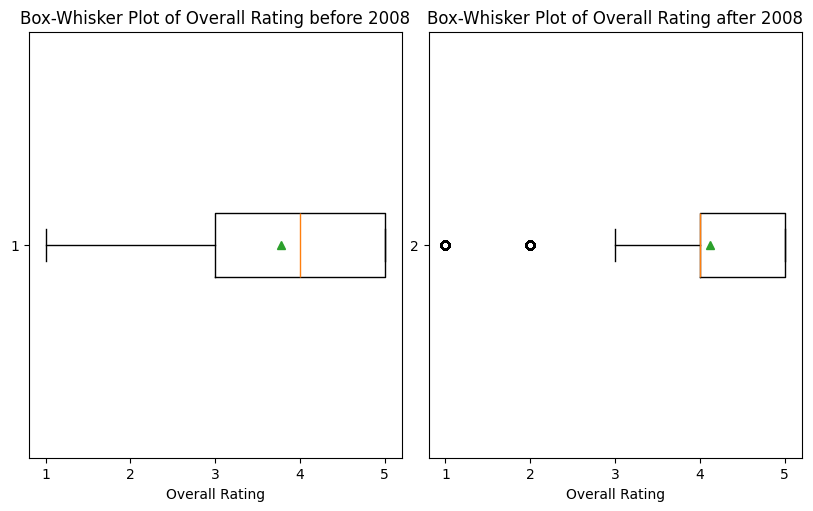

In [29]:
group1 = rating_df[
        (rating_df["Date_of_review"] >= start1) &
        (rating_df["Date_of_review"] <= end1 )
        ]["Overall_rating"].dropna()

group2 = rating_df[
        (rating_df["Date_of_review"] >= start2) &
        (rating_df["Date_of_review"] <= end2)
        ]["Overall_rating"].dropna()

plt.figure(figsize=(8, 5), layout="constrained")
plt.subplot(1,2,1)
plt.boxplot(group1, showmeans=True, vert=False)

plt.title('Box-Whisker Plot of Overall Rating before 2008')
plt.xlabel('Overall Rating')
plt.subplot(1,2,2)
plt.boxplot(group2, showmeans=True, vert=False)

plt.title('Box-Whisker Plot of Overall Rating after 2008')
plt.xlabel('Overall Rating')
plt.yticks([1], ["2"])

## 7.2 F-test

In [30]:
test_two_groups(_dataframe=rating_df, _start1=start1, _end1=end1, _start2=start2, _end2=end2, mode="T")
test_two_groups(_dataframe=rating_df, _start1=start1, _end1=end1, _start2=start2, _end2=end2, mode="Z")
test_two_groups(_dataframe=rating_df, _start1=start1, _end1=end1, _start2=start2, _end2=end2, mode="F")

T-score: -15.2638, P-value: 0.0000
	 Reject (H0)

Z-score: -15.2638, P-value: 0.0000
	 Reject (H0)

F-score: 1.6485, P-value: 0.0000
	 Reject (H0)



(np.float64(1.6484814389361164), np.float64(1.1102230246251565e-16))

#### Summary

**T-Test (Mean Comparison):**

T-statistic: -15.26
P-value: 0.0 (or very close to 0)
Interpretation: A large absolute T-statistic (far from 0) means a significant difference in means between the two groups. The p-value of 0 strongly supports rejecting the null hypothesis, meaning the groups have significantly different means.

**Z-Test (Mean Comparison with Known Population Variance):**

Z-statistic: -15.26
P-value: 6.81e-51 (almost 0)
Interpretation: Similar to the T-test, a large negative Z-statistic suggests a significant difference in means. The near-zero p-value indicates that we reject the null hypothesis, confirming a statistically significant difference between the two groups.

**F-Test (Variances Comparison)**

F-statistic: 508541.65 (very large) <br>
P-value: 1.11e-16 (very small) <br>
Interpretation: The F-statistic is very large, meaning the variance of one group is significantly different from the other. The extremely small p-value (< 0.05) suggests that we reject the null hypothesis, meaning the two groups do not have equal variances.

## 7.3 Chi-square test

### Hypothesis Test on visitor's and destination country name

### Confirm if each visitor's country_name maps to an unique country_id

In [31]:
rating_df.head() # print the first 5 rows of the dataset

,Visitors_country_name,Destination_country_name,Hotel_id,Reviewer_id,Review_id,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Date_of_review,Trip_type,Reviewer_rank,Hotel.stars,Hotel.price,Hotel.distance,Hotel.noofrooms,Suites,Family.Rooms,Microwave,Air.Conditioning,Minibar,Refrigerator.in.room,Bar.Lounge,Kitchenette,Free.Parking,Self.Serve.Laundry,Business.Centre.with.Internet.Access,Conference.Facilities,Meeting.Rooms,Banquet.Room,Casino.and.Gambling,Babysitting,Dry.Cleaning,Multilingual.Staff,Airport.Transportation,Free.Breakfast,Children.Activities...Kid...Family.Friendly..,Laundry.Service,Concierge,Room.Service,Restaurant,Shuttle.Bus.Service,Free.Internet,Free.High.Speed.Internet...WiFi..,Paid.Wifi,Paid.Internet,Public.Wifi,Ski.In...Ski.Out,Fitness.Centre.with.Gym...Workout.Room,Spa,Tennis.Court,Hot.Tub,Pool,Golf.course,Beach,Wheelchair.access,Reduced.mobility.rooms,Non.Smoking.Hotel,Non.Smoking.Rooms,Smoking.rooms.available,Pets.Allowed...Dog...Pet.Friendly..,Destination_country_GDP,Visitors_country_GDP,Destination_country_pdi,Destination_country_idv,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
0,Afghanistan,Egypt,d302323,BEFE48CEC37A8BAC68FC5471B7D52A68,131620232,59,1,3,2.0,3.0,3.0,3.0,3.0,4.0,2012-06-09,business,Reviewer,5.0,151.0,8.05,409.0,1,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,3314.5,664.8,70,25,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Japan,d1115809,390FEEFF2C67C9ACC376C133F3E5AD9D,223296192,96,1,4,NaN,NaN,NaN,5.0,4.0,5.0,2014-08-21,family,Top Contributor,3.0,94.0,4.99,250.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,38633.7,664.8,54,46,95,92,88,42,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Egypt,d300669,452C85191D400F6C83F249B4990CBD74,254401713,59,1,5,NaN,5.0,NaN,5.0,5.0,NaN,NaT,business,NaN,5.0,181.0,1.13,855.0,1,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,1,3314.5,664.8,70,25,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,United Kingdom,d187989,B112C906DAA206F9F2EA9613526DCD3A,23343685,199,1,4,3.0,5.0,4.0,5.0,NaN,4.0,2009-01-07,solo,Senior Reviewer,5.0,668.0,4.51,214.0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,41781.1,664.8,35,89,66,35,51,69,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Croatia,d601897,17552C71896B64C6EFCC959E1551F412,47403276,49,1,3,5.0,4.0,3.0,5.0,NaN,5.0,2009-10-21,solo,Senior Contributor,NaN,77.0,2.09,49.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13597.9,664.8,73,33,40,80,58,33,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Validate whether each visitor's country_name maps to an unique country_id
visitors_mapping = rating_df[['Visitors_country_name', 'Visitors_country_id']].drop_duplicates()
visitors_unique_mapping = visitors_mapping.groupby('Visitors_country_name')['Visitors_country_id'].nunique()

if (visitors_unique_mapping == 1).all():
    print("All country_name maps to an unique country_id")

# Print results
print(f"\tvisitors_unique_mapping.shape: {visitors_unique_mapping.shape}")
print(f"\t{visitors_unique_mapping.value_counts()}")


All country_name maps to an unique country_id
	visitors_unique_mapping.shape: (94,)
	Visitors_country_id
1    94
Name: count, dtype: int64


In [ ]:
# Validate whether each destination country_name maps to an unique country_id
destination_mapping = rating_df[['Destination_country_name', 'Destination_country_id']].drop_duplicates()
destination_unique_mapping = destination_mapping.groupby('Destination_country_name')['Destination_country_id'].nunique()

if (destination_unique_mapping == 1).all():
    print("O: All country_name maps to an unique ID.")
else:
    print("X: Some country_name maps to different IDs.")

# Print results
print(f"\tdestination_unique_mapping.shape: {destination_unique_mapping.shape}")
print(f"\t{destination_unique_mapping.value_counts()}")

O: All country_name maps to an unique ID.
	destination_unique_mapping.shape: (80,)
	Destination_country_id
1    80
Name: count, dtype: int64


In [34]:
# Verify if both Visitors_country_id and Destination_country_id always maps to same Country name (Visitors_country_name, Destination_country_name) 
visitors_mapping = rating_df[['Visitors_country_id', 'Visitors_country_name']].drop_duplicates()
destination_mapping = rating_df[['Destination_country_id', 'Destination_country_name']].drop_duplicates()
print(f"visitors_mapping.shape: {visitors_mapping.shape}") # (94, 2)
print(f"destination_mapping.shape: {destination_mapping.shape}") # (80, 2)

# Merge data which contains country ID from both visitor and destination
merged_mapping = visitors_mapping.merge(
    destination_mapping,
    left_on="Visitors_country_id",
    right_on="Destination_country_id",
    suffixes=('_visitor', '_destination')
)
print(f"merged_mapping.shape: {merged_mapping.shape}") # (36, 4)

# Check if there exists datas with same country_id but different country_names
mismatch = merged_mapping[merged_mapping['Visitors_country_name'] != merged_mapping['Destination_country_name']]

# All country_id values map to the same country_name in both Visitors and Destination.
if mismatch.empty:
    print("O: All country_id values map to the same country_name in both Visitors and Destination.")
else:
    print("X: Some country_id values map to different country_name values!")
    print(mismatch)


visitors_mapping.shape: (94, 2)
destination_mapping.shape: (80, 2)
merged_mapping.shape: (36, 4)
O: All country_id values map to the same country_name in both Visitors and Destination.


### About the countries in our dataset:
* visitors_mapping.shape: (94, 2) => visitors came from 94 different countries   
* destination_mapping.shape: (80, 2) => visitors traveled into 80 different countries   
* merged_mapping.shape: (36, 4) => there are 36 different countries which are overlapped between visitor's countries and the destination  

###  Chi-Square Test Assumptions:
* H0 (Null Hypothesis): `Visitors_country_name` and `Destination_country_name` are `independent`, meaning there is no statistical relationship between a visitor's country and their chosen destination..  
* H1 (Alternative Hypothesis): `Visitors_country_name` and `Destination_country_name` are `dependent`, implying that visitors from certain countries may have a preference for specific destination countries.

We define a function `chi_square_func` ro run the test.

In [35]:
def chi_square_func(group1: pd.DataFrame, group2: pd.DataFrame, visitors_mapping: pd.DataFrame, destination_mapping: pd.DataFrame):
     # Convert country id into country name
    group1_named = group1.to_frame().merge(visitors_mapping, left_on=group1.name, right_on="Visitors_country_id", how="left")["Visitors_country_name"]
    group2_named = group2.to_frame().merge(destination_mapping, left_on=group2.name, right_on="Destination_country_id", how="left")["Destination_country_name"]

    # Establish Contingency Table
    contingency_table = pd.crosstab(group1_named, group2_named)
    # contingency_table = pd.crosstab(group1, group2)

    # Run Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Chi-Square Statistic: {chi2}") # Showing the degree of the relation between these two variables.
    print(f"P-value: {p}") # Showing the probability of occuring this relation.
    print(f"dof: {dof}") # Degrees of Freedom
    # print(f"expected.shape: {expected.shape}")
    # print(f"expected: {expected}") # The expected Frequency for each cell if independent case.

    # Print results
    if p < 0.05:
        print("(Reject H0)")
        # print("There is a significant relationship between Visitors_country_id and Destination_country_id.")
        print("(Reject H0) There is a significant relationship between Visitors_country_name and Destination_country_name.")
    else:
        print("(Failed to reject H0)")
        print("(Failed to reject H0) There is no significant relationship between Visitors_country_name and Destination_country_name.")
        # print("There is no significant relationship between Visitors_country_id and Destination_country_id.")
    return contingency_table

#### Test 1: Input of the following Chi-Square test:  
* Group1: 94 different Visitors_country_name  
* Group2: 80 different Destination_country_name  

In [36]:
contingency_table1 = chi_square_func(
    rating_df["Visitors_country_id"],
    rating_df["Destination_country_id"],
    visitors_mapping,
    destination_mapping
)
# contingency_table1 = chi_square_func(rating_df['Visitors_country_id'], rating_df['Destination_country_id'])
contingency_table1.head()


Chi-Square Statistic: 2806903.9356253743
P-value: 0.0
dof: 7347
(Reject H0)
(Reject H0) There is a significant relationship between Visitors_country_name and Destination_country_name.


Destination_country_name,Albania,Angola,Argentina,Australia,Austria,Bangladesh,Belgium,Brazil,Bulgaria,Burkina Faso,Canada,Cape Verde,Chile,China,Colombia,Croatia,Czech Republic,Denmark,Dominican Republic,Egypt,El Salvador,Estonia,Finland,France,Germany,Ghana,Greece,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Italy,Japan,Jordan,Latvia,Lebanon,Libya,Lithuania,Luxembourg,Malaysia,Malta,Mexico,Morocco,Mozambique,Netherlands,New Zealand,Nigeria,Norway,Pakistan,Peru,Philippines,Poland,Portugal,Romania,Russia,Saudi Arabia,Serbia,Singapore,Slovakia,Slovenia,South Africa,South Korea,Spain,Sweden,Switzerland,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Turkey,United Kingdom,United States,Uruguay,Venezuela,Vietnam,Zambia
Visitors_country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,2,0,3,0,0,0,0,0,2,0,1,3,3,0,0,4,0,0,0,6,2,0,6,11,6,0,59,2,0,0,8,11,2,3,0,0,0,1,0,2,0,1,0,0,7,0,0,0,0,2,13,1,0,3,0,0,2,6,0,1,0,0,3,1,0,1,2,35,0,1,24,2,0,0,4,1
Aland Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0
Albania,52,0,0,0,28,0,5,0,10,0,0,0,0,1,1,6,12,2,0,1,0,0,1,15,7,0,26,3,10,0,2,1,0,0,4,36,0,2,1,1,0,1,0,3,0,0,0,0,23,0,0,1,0,0,0,0,2,5,5,0,11,9,2,8,0,2,9,4,0,1,0,4,0,4,23,7,0,0,0,0
Algeria,0,0,1,0,25,0,12,1,0,1,0,0,1,4,1,2,10,1,0,17,0,0,0,75,8,0,12,6,12,0,11,2,0,0,2,60,2,11,0,5,1,0,1,31,2,1,9,0,20,0,0,4,0,0,1,1,8,1,5,0,2,3,2,1,1,1,57,2,0,0,0,13,0,1,25,4,0,0,2,0
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Test 2: Input of the following Chi-Square test:  
* Group1: 36 different Visitors_country_name  
* Group2: 36 different Destination_country_name  

In [37]:
contingency_table2 = chi_square_func(
    merged_mapping["Visitors_country_id"],
    merged_mapping["Destination_country_id"],
    visitors_mapping,
    destination_mapping
)
# contingency_table2 = chi_square_func(merged_mapping['Visitors_country_id'], merged_mapping['Destination_country_id'])
contingency_table2.head()


Chi-Square Statistic: 1260.0
P-value: 0.23763834445310342
dof: 1225
(Failed to reject H0)
(Failed to reject H0) There is no significant relationship between Visitors_country_name and Destination_country_name.


Destination_country_name,Albania,Angola,Argentina,Australia,Austria,Bangladesh,Belgium,Brazil,Bulgaria,Burkina Faso,Canada,Cape Verde,Chile,China,Colombia,Croatia,Czech Republic,Denmark,Dominican Republic,Egypt,El Salvador,Estonia,Finland,France,Germany,Ghana,Greece,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Italy
Visitors_country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Angola,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Summary of Chi-Square test (Test 1 & Test 2)
* In Test 1, the Chi-Square Statistic is 2,806,903.94, which indicates a substantial difference between Visitors_country_name and Destination_country_name.
Since the p-value = 0.0, which is less than 0.05, the null hypothesis (H₀) is rejected, suggesting a significant relationship between these two variables.

* In Test 2, the p-value = 0.2376, which is greater than 0.05, meaning we fail to reject the null hypothesis (H₀). This implies that there is no statistically significant relationship between Visitors_country_name and Destination_country_name in this subset of the data.

* Comparison of Test 1 and Test 2:
The dataset in Test 2 is a smaller subset of Test 1, focusing only on the overlapping 36 countries between visitors and destinations.
The results suggest that the omitted countries in Test 2 may play a crucial role in establishing the statistical relationship observed in Test 1.
This indicates that excluding certain countries might reduce the observed significance, highlighting their importance in shaping the overall travel patterns.

## 7.4 ANOVA (F-test)

We will perform an ANOVA analysis to examine the effect of `trip_type` on `overall_rating`.

The trip types include solo travelers, couples, families, friends, and business trips. Since the purpose of travel likely influences expectations and experiences, this analysis will determine whether these groups report significantly different levels of satisfaction.

#### Hypothesis test assumptions
* H0 (Null Hypothesis): The mean overall ratings are the same across all trip types.  
* H1 (Alternative Hypothesis): At least one trip type has a different mean overall rating.

In [38]:
# Grouping overall ratings by trip type
leisure_trips = (rating_df['Trip_type'] == 'solo') | (rating_df['Trip_type'] == 'couple') | (rating_df['Trip_type'] == 'friends') | (rating_df['Trip_type'] == 'family')
business_ratings = rating_df[rating_df['Trip_type'] == 'business']['Overall_rating']
solo_ratings = rating_df[rating_df['Trip_type'] == 'solo']['Overall_rating']
couple_ratings = rating_df[rating_df['Trip_type'] == 'couple']['Overall_rating']
friends_ratings = rating_df[rating_df['Trip_type'] == 'friends']['Overall_rating']
family_ratings = rating_df[rating_df['Trip_type'] == 'family']['Overall_rating']
leisure_ratings = rating_df[leisure_trips]['Overall_rating']

# ANOVA F-test
f_stat, p_value = f_oneway(business_ratings, solo_ratings, couple_ratings, friends_ratings, family_ratings)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Hypothesis testing
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one trip type has a different mean overall rating.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean overall ratings among trip types.")

F-Statistic: 863.5216153145097
P-Value: 0.0
Reject the null hypothesis: At least one trip type has a different mean overall rating.


#### Summary
The F-statistic of 863.52 and a p-value is 0.0 indicate a highly significant difference in overall ratings across trip types. With a p-value < 0.05, we reject the null hypothesis. This means that there is a statistically significant difference in the mean overall ratings between two of the trip types. In other words, the type of trip a traveler is on, has a meaningful effect on the overall rating they provide.

In [39]:
mean_ratings = {
    'Trip Type': ['business', 'couple', 'family', 'friends', 'solo'],
    'Mean Rating': [np.mean(business_ratings), np.mean(couple_ratings), np.mean(family_ratings), np.mean(friends_ratings), np.mean(solo_ratings)]
}
df_mean_ratings = pd.DataFrame(mean_ratings)
print(df_mean_ratings)

  Trip Type  Mean Rating
0  business     3.942140
1    couple     4.100585
2    family     4.053794
3   friends     3.987666
4      solo     3.994783


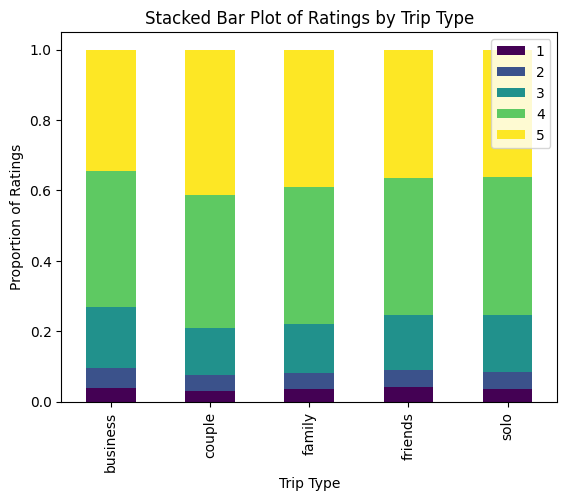

In [40]:
# Create a pivot table to calculate the proportion of ratings for each trip type
rating_pivot = rating_df.groupby(['Trip_type', 'Overall_rating']).size().unstack()

# Normalize the values by dividing by the total count for each Trip_type
rating_pivot_norm = rating_pivot.div(rating_pivot.sum(axis=1), axis=0)

# Plot the stacked bar plot
rating_pivot_norm.plot(kind='bar', stacked=True, colormap='viridis')
plt.legend()
plt.title('Stacked Bar Plot of Ratings by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Proportion of Ratings')
plt.show()

The stacked bar plot displays the relative proportions of ratings for each trip type: business, couples, family, friends, and solo travelers. Each bar is segmented based on the rating (1 through 5).
* **Couples** tend to give the highest ratings (mean 4.10), with the largest proportion of 5-star ratings and the smallest share of lower ratings.
* **Business travelers** show a more balanced distribution (mean 3.94), with fewer 5-star ratings and a noticeable presence of 3-star ratings, suggesting more critical evaluations.
* **Family**, **friends**, and **solo travelers** display similar patterns, predominantly rating between 4 and 5, but slightly less satisfied compared to couples.

## Conclusion
* Given the dataset's large size (over 1 million entries) and non-normal distribution, the T-test is the best choice for comparing overall ratings before and after 2008, as it handles unequal variances and non-normality effectively. 
* While the F-test is good for comparing variances or in ANOVA when analyzing multiple groups, it assumes normality and equal variances, making it less reliable here. 
* Even if Z-test results were similar due to the large samples, T-test results are the better choice when population variances are unknown. 
* For categorical comparisons, like country names, the Chi-square test identified significant associations between visitor original country and their destinations.

# 8. Time series

This part provides a comprehensive analysis of historical review data to identify trends and seasonal patterns in customer ratings over time. Utilizing statistical methods such as moving averages and seasonal decomposition. We tried to ebserve the time trend of overall-ratings in our dataset. First, we review what we have done in the previous work.

Historical trend of the mean overall rating scores

C:\Users\Madalina\AppData\Local\Temp\ipykernel_14104\4154795796.py:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ticks = pd.date_range(start='2002-01-01', end='2016-01-01', freq='2Y')


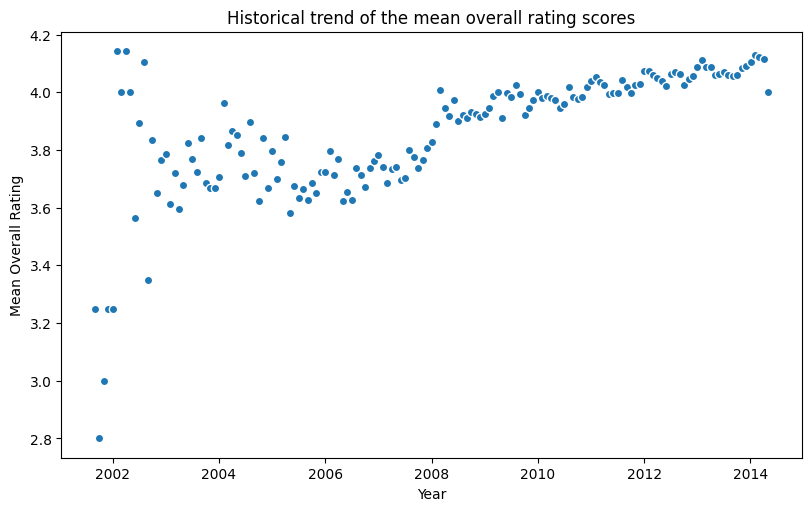

In [41]:
# Change the date column to be of type datetime
review_date = pd.to_datetime(rating_df['Date_of_review'])

# Extract the year from the review_date column
review_year_month = review_date.dt.to_period('M')

# Group by year and calculate the mean overall rating
mean_ratings_monthly = rating_df.groupby(review_year_month)['Overall_rating'].mean()
mean_ratings_monthly.index = mean_ratings_monthly.index.to_timestamp()

# Scatter Plot
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.scatter(mean_ratings_monthly.index, mean_ratings_monthly.values, edgecolors='white')
ax.set_title('Historical trend of the mean overall rating scores')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Overall Rating')

# Show ticks from 2002 to 2016 with an interval of 2 years
ticks = pd.date_range(start='2002-01-01', end='2016-01-01', freq='2Y')
plt.xticks(ticks, labels=[tick.strftime('%Y') for tick in ticks])

plt.show()

Total number of rating by year

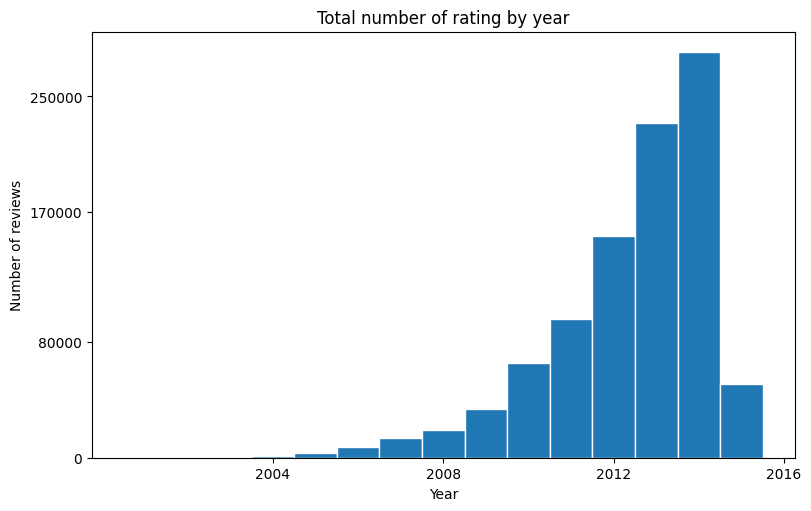

In [42]:
# Extract the year from the review_date column
review_year = review_date.dt.year

# Histogram
fig, ax = plt.subplots(figsize=(8, 5), layout="constrained")
ax.hist(review_year, bins=range(2001, 2017), edgecolor='white', align='left')
ax.set_title('Total number of rating by year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of reviews')

# Set x-axis and y-axis tick marks and labels
x_ticks = np.linspace(2004, 2016, 4)
plt.xticks(x_ticks)

y_ticks = np.linspace(0, 250000, 4)
y_ticks = [round(tick, -4) for tick in y_ticks] # round to the nearest tens of thousands (4 zeros)
plt.yticks(y_ticks)

plt.show()

### Question: It shows that the overall_rating increases in our dataset. But is there any other patterns inside our data? 

## 8.1 Generate one time series by transforming your existing data sources.

Convert the `timing information` to datetime, and set `Date_of_review` as index.

In [43]:
path = "../dataset/The final data set (uncentered and unscaled variables).csv"
rating_df = pd.read_csv(path)
print(f"Shape of dataset: {rating_df.shape}")

# Convert 'Date_of_review' to datetime
rating_df['Date_of_review'] = pd.to_datetime(rating_df['Date_of_review'])

# Set 'Date_of_review' as the index
rating_df.set_index('Date_of_review', inplace=True)

rating_df.head()

Shape of dataset: (1048575, 80)


,Visitors_country_name,Destination_country_name,Hotel_id,Reviewer_id,Review_id,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Trip_type,Reviewer_rank,Hotel.stars,Hotel.price,Hotel.distance,Hotel.noofrooms,Suites,Family.Rooms,Microwave,Air.Conditioning,Minibar,Refrigerator.in.room,Bar.Lounge,Kitchenette,Free.Parking,Self.Serve.Laundry,Business.Centre.with.Internet.Access,Conference.Facilities,Meeting.Rooms,Banquet.Room,Casino.and.Gambling,Babysitting,Dry.Cleaning,Multilingual.Staff,Airport.Transportation,Free.Breakfast,Children.Activities...Kid...Family.Friendly..,Laundry.Service,Concierge,Room.Service,Restaurant,Shuttle.Bus.Service,Free.Internet,Free.High.Speed.Internet...WiFi..,Paid.Wifi,Paid.Internet,Public.Wifi,Ski.In...Ski.Out,Fitness.Centre.with.Gym...Workout.Room,Spa,Tennis.Court,Hot.Tub,Pool,Golf.course,Beach,Wheelchair.access,Reduced.mobility.rooms,Non.Smoking.Hotel,Non.Smoking.Rooms,Smoking.rooms.available,Pets.Allowed...Dog...Pet.Friendly..,Destination_country_GDP,Visitors_country_GDP,Destination_country_pdi,Destination_country_idv,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
Date_of_review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-06-09,Afghanistan,Egypt,d302323,BEFE48CEC37A8BAC68FC5471B7D52A68,131620232,59,1,3,2.0,3.0,3.0,3.0,3.0,4.0,business,Reviewer,5.0,151.0,8.05,409.0,1,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,3314.5,664.8,70,25,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-21,Afghanistan,Japan,d1115809,390FEEFF2C67C9ACC376C133F3E5AD9D,223296192,96,1,4,NaN,NaN,NaN,5.0,4.0,5.0,family,Top Contributor,3.0,94.0,4.99,250.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,38633.7,664.8,54,46,95,92,88,42,NaN,NaN,NaN,NaN,NaN,NaN
NaT,Afghanistan,Egypt,d300669,452C85191D400F6C83F249B4990CBD74,254401713,59,1,5,NaN,5.0,NaN,5.0,5.0,NaN,business,NaN,5.0,181.0,1.13,855.0,1,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,1,3314.5,664.8,70,25,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,Afghanistan,United Kingdom,d187989,B112C906DAA206F9F2EA9613526DCD3A,23343685,199,1,4,3.0,5.0,4.0,5.0,NaN,4.0,solo,Senior Reviewer,5.0,668.0,4.51,214.0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,41781.1,664.8,35,89,66,35,51,69,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-21,Afghanistan,Croatia,d601897,17552C71896B64C6EFCC959E1551F412,47403276,49,1,3,5.0,4.0,3.0,5.0,NaN,5.0,solo,Senior Contributor,NaN,77.0,2.09,49.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13597.9,664.8,73,33,40,80,58,33,NaN,NaN,NaN,NaN,NaN,NaN


Resample the data monthly and calculate the mean of `Overall_rating`, store the results into `monthly_data`.

In [44]:
# Resample the data monthly and calculate the mean of 'Overall_rating'
monthly_data = rating_df['Overall_rating'].resample('M').mean()

# Display the first few entries of the resampled data
monthly_data.head()

C:\Users\Madalina\AppData\Local\Temp\ipykernel_14104\3493265860.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = rating_df['Overall_rating'].resample('M').mean()


Date_of_review
2002-09-30    3.25
2002-10-31    2.80
2002-11-30    3.00
2002-12-31    3.25
2003-01-31    3.25
Name: Overall_rating, dtype: float64

## 8.2 Identify a pattern or a trend in the time series.
This section will be performed in further section, the `Deseasonalize`.

## 8.3 Apply the Augmented Dickey-Fuller (ADF) test to check if stationarity

In [45]:
adf_test = stattools.adfuller(monthly_data)

adf_statistic = adf_test[0]   # Test statistic
p_value = adf_test[1]         # p-value
critical_values = adf_test[4] # Critical values at 1%, 5%, and 10% levels

print(f"ADF Statistic: {adf_statistic}")
print(f"P-Value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"\t{key}: {value}")

if p_value < 0.05:
    print("The time series is stationary (Reject H0).")
else:
    print("The time series is non-stationary (Fail to reject H0).")


ADF Statistic: -0.39383188205372843
P-Value: 0.9111235494991519
Critical Values:
	1%: -3.4782936965183815
	5%: -2.882567574015525
	10%: -2.5779830117488745
The time series is non-stationary (Fail to reject H0).


The ADF statistic of -0.39 is higher than the critical values at the 1%, 5%, and 10% significance levels, which indicates that the time series is non-stationary. Additionally, the p-value of 0.91 exceeds the 0.05 threshold, meaning we fail to reject the null hypothesis. We conclude that the time series is non-stationary and may need to perform transformations such as differencing, detrending, or deseasonalizing before further analysis.

## 8.4 Calculate and plot the Moving Averages from the time series.

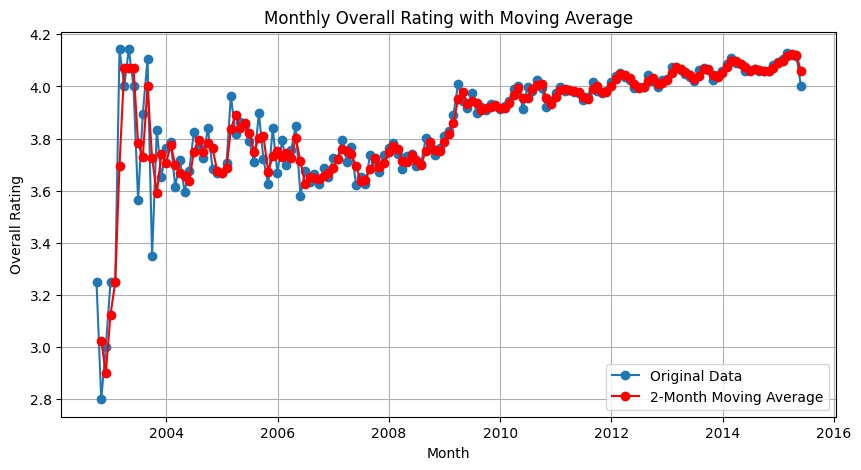

In [46]:
# Calculate the moving average using a 2-year window
moving_average = monthly_data.rolling(window=2).mean()

# Plot the original time series and the moving average
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, marker='o', linestyle='-', label="Original Data")
plt.plot(moving_average, marker='o', linestyle='-', color='red', label="2-Month Moving Average")
plt.title("Monthly Overall Rating with Moving Average")
plt.xlabel("Month")
plt.ylabel("Overall Rating")
plt.legend()
plt.grid()
plt.show()

Explanation:  
* The chart displays the monthly overall rating data over several years, marked by blue dots, showing the fluctuating nature of the ratings from month to month.
* A two-month moving average, depicted in red, smooths these fluctuations to illustrate the underlying trend, highlighting periods of improvement or decline in ratings.
* The moving average line generally stays above the 3.8 rating mark after 2008, indicating a relatively stable and positive trend in overall ratings during this period.

## 8.5 `Deseasonalize` the time series

### 8.5.1 Model='additive'

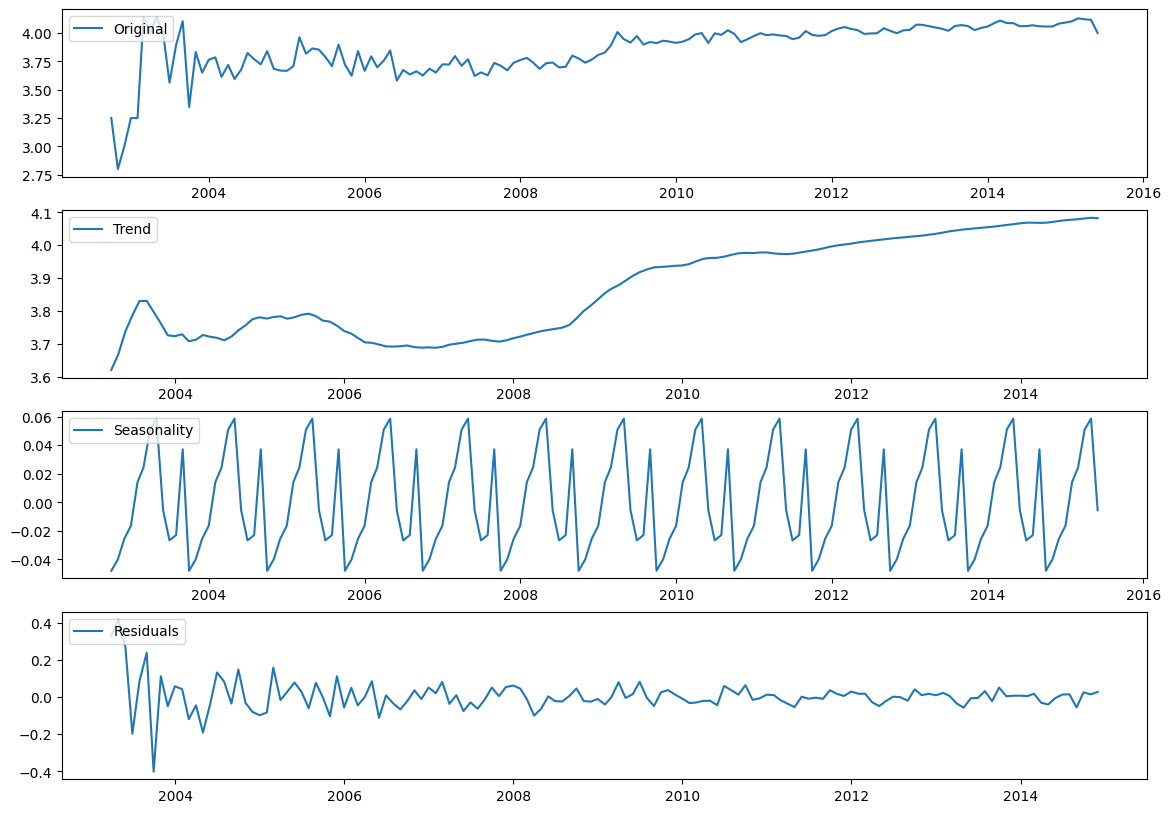

In [47]:
# Perform seasonal decomposition of the annual data to identify trend and pattern
decomposition = seasonal_decompose(monthly_data.dropna(), model='additive')  # Assuming an additive model initially

# Plot the decomposition to visualize trend, seasonality, and residuals
plt.figure(figsize=(14, 10))

components = {
    'Original': decomposition.observed,
    'Trend': decomposition.trend,
    'Seasonality': decomposition.seasonal,
    'Residuals': decomposition.resid
}

for i, (label, component) in enumerate(components.items(), start=1):
    plt.subplot(4, 1, i)
    plt.plot(component, label=label)
    plt.legend(loc='upper left')

Additive Model Explanation:   
* The chart shows the decomposition of the time series into its constituent parts under the assumption of an additive model, where fluctuations in seasonality are consistent over time.
* Components of Additive Model: It displays four plots – the original data with minor fluctuations around 3.5 to 4.0, a slowly increasing trend suggesting a gradual improvement over time, relatively stable seasonal fluctuations, and small residuals indicating minor deviations from the model.

### 8.5.2 Model='multiplicative'

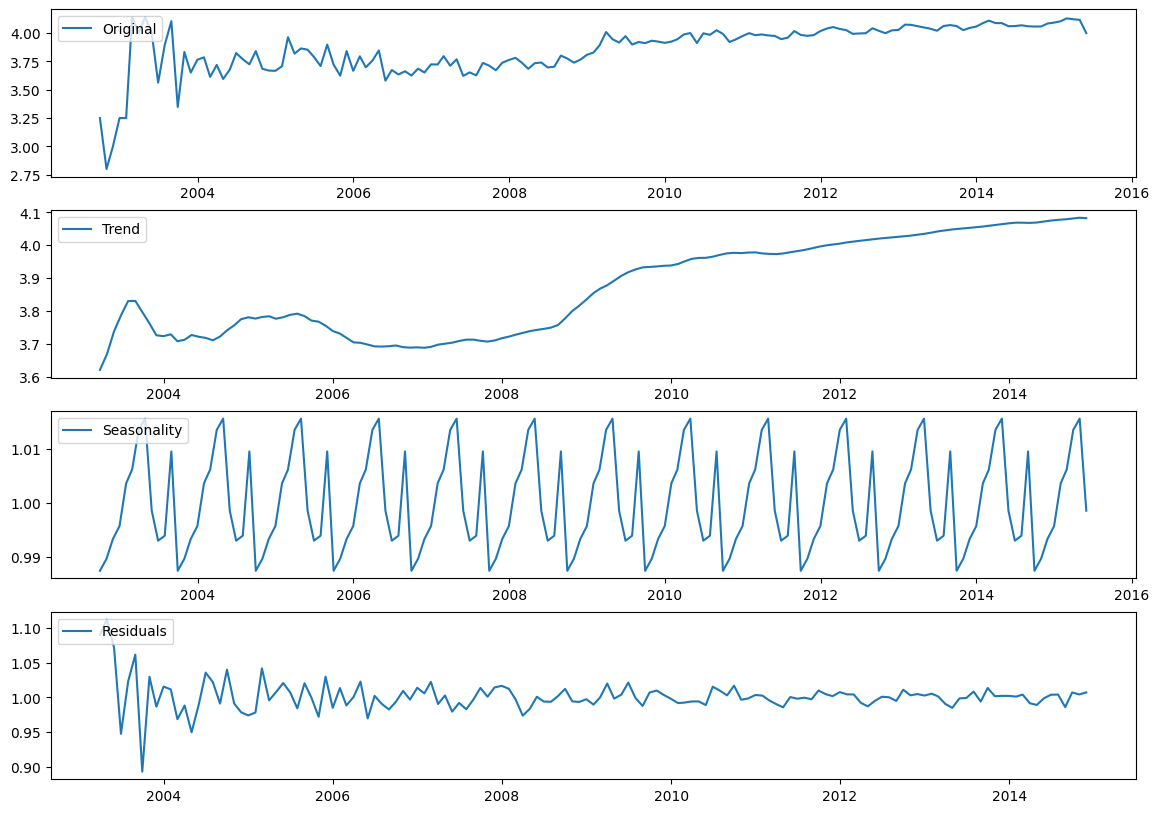

In [48]:
# Perform seasonal decomposition of the annual data to identify trend and pattern
decomposition = seasonal_decompose(monthly_data.dropna(), model='multiplicative')  # Assuming an additive model initially

# Plot the decomposition to visualize trend, seasonality, and residuals
plt.figure(figsize=(14, 10))

components = {
    'Original': decomposition.observed,
    'Trend': decomposition.trend,
    'Seasonality': decomposition.seasonal,
    'Residuals': decomposition.resid
}

for i, (label, component) in enumerate(components.items(), start=1):
    plt.subplot(4, 1, i)
    plt.plot(component, label=label)
    plt.legend(loc='upper left')

Multiplicative Model Explanation:  
* The chart presents the same decomposition under a multiplicative model, which is used when seasonal variations are proportional to the level of the time series.
* Components of Multiplicative Model: This includes the original data showing similar fluctuations, a visible upward trend that captures an increasing pattern in the data, pronounced seasonal peaks that scale with the trend, and relatively consistent residuals close to 1, suggesting the model fits well.

Compare between different models:  
* Seasonal Patterns received from `Deseasonalize`: 
    In both models, the seasonality shows clear periodic patterns, but the amplitude of seasonal changes in the multiplicative model increases as the data values rise, unlike in the additive model where these fluctuations are constant.
* Trend and Residuals Comparison: 
    The trend in both models highlights an overall increase, yet the multiplicative model more clearly aligns with increasing seasonal peaks, and the residuals in both models suggest the selected model structures adequately capture the underlying patterns with only minor unexplained variations.

## Summary

The series of analyses provides a detailed examination of review data through various statistical techniques, capturing trends, seasonality, and the distribution of reviews over time. The presentation begins by plotting the historical trend of mean overall ratings monthly, highlighting both fluctuations and a noticeable improvement in ratings over the years. A histogram underscores the growth in the total number of reviews annually, with a significant uptick observed from 2004 to 2012, followed by a decline. Another analysis involves monthly overall ratings with a two-month moving average, showing how smoothing techniques clarify underlying trends amidst data volatility. The concluding segments delve into seasonal decompositions of the data under additive and multiplicative models, isolating and contrasting trends, seasonal effects, and residuals to discern underlying patterns. These patterns indicate that seasonal impacts are more accentuated under the multiplicative model as it aligns with the increasing scale of the data. This comprehensive analysis is crucial for understanding consumer sentiment, offering essential insights into customer satisfaction and business performance over time.

# 9. Clustering

- Clustering can be applied to our dataset by grouping similar reviews, destinations, or trip type,  based on features like overall rating, value ratings, or location. For example, using k-means clustering, we can identify clusters of reviews with similar sentiment or categorize destinations by types (solo, family etc). This helps in offering personalized recommendations or grouping similar experiences. 

In [5]:
"""
Load the reduced data again from csv and run Shapiro test.
"""
path = "../dataset/The final data set (uncentered and unscaled variables).csv"
rating_df = pd.read_csv(path)
print(f"Shape of dataset: {rating_df.shape}")

Shape of dataset: (1048575, 80)


In [6]:
"""
Show the null fields in the dataset. Tools: isnull()
"""
# Return checking results from all columns in df.
ck_results_isnull = rating_df.isnull().sum() 

# Keep the specific columns including missing values, (Condidion: ck_results_isnull > 0).
missing_values_cols = ck_results_isnull[ck_results_isnull > 0]
print(f"Missing values: \n{missing_values_cols}")

Missing values: 
Location_rating            229128
Cleanliness_rating         200559
Rooms_rating               255351
Service_rating              93225
Sleepquality_rating        313724
Value_rating               198890
Date_of_review              93050
Trip_type                  134225
Reviewer_rank              206794
Hotel.stars                 22838
Hotel.price                 82560
Hotel.distance              18773
Hotel.noofrooms              4412
Destination_country_GDP      6555
Visitors_country_GDP         4189
Visitors_country_pdi        24428
Visitors_country_idv        24428
Visitors_country_mas        24428
Visitors_country_uai        24428
Visitors_country_lto        29408
Visitors_country_ivr        46917
dtype: int64


In [7]:
# Checking features that are considered numeric in our dataset
print(rating_df.select_dtypes(include=['number']).columns)

Index(['Review_id', 'Destination_country_id', 'Visitors_country_id',
       'Overall_rating', 'Location_rating', 'Cleanliness_rating',
       'Rooms_rating', 'Service_rating', 'Sleepquality_rating', 'Value_rating',
       'Hotel.stars', 'Hotel.price', 'Hotel.distance', 'Hotel.noofrooms',
       'Suites', 'Family.Rooms', 'Microwave', 'Air.Conditioning', 'Minibar',
       'Refrigerator.in.room', 'Bar.Lounge', 'Kitchenette', 'Free.Parking',
       'Self.Serve.Laundry', 'Business.Centre.with.Internet.Access',
       'Conference.Facilities', 'Meeting.Rooms', 'Banquet.Room',
       'Casino.and.Gambling', 'Babysitting', 'Dry.Cleaning',
       'Multilingual.Staff', 'Airport.Transportation', 'Free.Breakfast',
       'Children.Activities...Kid...Family.Friendly..', 'Laundry.Service',
       'Concierge', 'Room.Service', 'Restaurant', 'Shuttle.Bus.Service',
       'Free.Internet', 'Free.High.Speed.Internet...WiFi..', 'Paid.Wifi',
       'Paid.Internet', 'Public.Wifi', 'Ski.In...Ski.Out',
       'F

In [8]:
# Change data types to ID features that are considered numerical
columns_to_change = ["Review_id", "Destination_country_id", "Visitors_country_id"]
rating_df[columns_to_change] = rating_df[columns_to_change].astype("object")

In [9]:
# Check skew values of numerical columns
numeric_cols = rating_df.select_dtypes(include=['number'])
skew_values = numeric_cols.skew().sort_values(ascending=False)
print(skew_values)

Ski.In...Ski.Out                     46.417328
Hotel.distance                       30.113650
Beach                                 9.561702
Casino.and.Gambling                   8.408424
Golf.course                           7.320577
                                       ...    
Location_rating                      -1.423323
Cleanliness_rating                   -1.483760
Non.Smoking.Rooms                    -2.405593
Free.High.Speed.Internet...WiFi..    -2.451427
Free.Internet                        -3.417642
Length: 70, dtype: float64


### Normalize numerical features using appropriate method based on feature characteristics.
* Strategies:   
Right Skewed（Skewness > 1） → Log Transformation (Compress the long tail)  
Left Skewed（Skewness < -1） → Log Transformation (Compress the long tail)  
Close to symetric（-1 ≤ Skewness ≤ 1） → Z-score Scaling（Keep in the same period）  

In [11]:
rating_df_numeric = rating_df.select_dtypes(include=['number']).copy()
skewness = rating_df_numeric.skew()

SKEWNESS_THRESHOLD = 1 # 0.5

# Fill missing values & Run Normalization
for col in rating_df_numeric.columns:
    if skewness[col] > SKEWNESS_THRESHOLD or skewness[col] < SKEWNESS_THRESHOLD: # Left or right Skewed
        rating_df_numeric[col] = rating_df_numeric[col].fillna(rating_df_numeric[col].median())
        rating_df_numeric[col] = np.log1p(rating_df_numeric[col])
    else:  # Symetric
        rating_df_numeric[col] = rating_df_numeric[col].fillna(rating_df_numeric[col].mean())
        scaler = StandardScaler()
        rating_df_numeric[col] = scaler.fit_transform(rating_df_numeric[[col]])

print("Numerical features summary statistics:")
display(rating_df_numeric.describe())

print("\nFirst 5 rows for numerical features:")
display(rating_df_numeric.head())

Numerical features summary statistics:


,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Hotel.stars,Hotel.price,Hotel.distance,...,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.587331e+00,1.689830e+00,1.668819e+00,1.581796e+00,1.603557e+00,1.612199e+00,1.580046e+00,1.548115e+00,4.909527e+00,1.260795e+00,...,3.890949e+00,3.992562e+00,3.887683e+00,3.829366e+00,3.870758e+00,4.054584e+00,3.990497e+00,4.109089e+00,3.766338e+00,3.952207e+00
std,2.514682e-01,1.794903e-01,2.139170e-01,2.240243e-01,2.489474e-01,2.050573e-01,2.348766e-01,1.808122e-01,6.117450e-01,6.740733e-01,...,4.633175e-01,5.707401e-01,4.425446e-01,4.191991e-01,4.314513e-01,4.547883e-01,2.528463e-01,3.312598e-01,4.957530e-01,3.680933e-01
min,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,2.079442e+00,0.000000e+00,...,1.791759e+00,2.197225e+00,1.609438e+00,0.000000e+00,2.484907e+00,1.945910e+00,2.397895e+00,3.178054e+00,1.609438e+00,1.609438e+00
25%,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.386294e+00,4.553877e+00,7.561220e-01,...,3.761200e+00,3.583519e+00,3.496508e+00,3.526361e+00,3.610918e+00,3.850148e+00,3.912023e+00,3.891820e+00,3.218876e+00,3.713572e+00
50%,1.609438e+00,1.791759e+00,1.791759e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,4.919981e+00,1.128171e+00,...,4.043051e+00,4.174387e+00,3.951244e+00,3.850148e+00,3.912023e+00,4.219508e+00,4.043051e+00,4.189655e+00,3.806662e+00,4.094345e+00
75%,1.791759e+00,1.791759e+00,1.791759e+00,1.791759e+00,1.791759e+00,1.791759e+00,1.791759e+00,1.609438e+00,5.308268e+00,1.735189e+00,...,4.204693e+00,4.454347e+00,4.158883e+00,4.189655e+00,4.234107e+00,4.343805e+00,4.127134e+00,4.406719e+00,4.158883e+00,4.234107e+00
max,1.791759e+00,1.791759e+00,1.791759e+00,1.791759e+00,1.791759e+00,1.791759e+00,1.791759e+00,1.791759e+00,6.907755e+00,6.294786e+00,...,4.615121e+00,4.615121e+00,4.615121e+00,4.615121e+00,4.564348e+00,4.510860e+00,4.488636e+00,4.615121e+00,4.477337e+00,4.499810e+00



First 5 rows for numerical features:


,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Hotel.stars,Hotel.price,Hotel.distance,...,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
0,1.386294,1.098612,1.386294,1.386294,1.386294,1.386294,1.609438,1.791759,5.023881,2.202765,...,3.828641,4.394449,2.079442,1.609438,3.912023,4.219508,4.043051,4.189655,3.806662,4.094345
1,1.609438,1.791759,1.791759,1.609438,1.791759,1.609438,1.791759,1.386294,4.553877,1.790091,...,4.564348,4.532599,4.488636,3.761200,3.912023,4.219508,4.043051,4.189655,3.806662,4.094345
2,1.791759,1.791759,1.791759,1.609438,1.791759,1.791759,1.609438,1.791759,5.204007,0.756122,...,3.828641,4.394449,2.079442,1.609438,3.912023,4.219508,4.043051,4.189655,3.806662,4.094345
3,1.609438,1.386294,1.791759,1.609438,1.791759,1.609438,1.609438,1.791759,6.505784,1.706565,...,4.204693,3.583519,3.951244,4.248495,3.912023,4.219508,4.043051,4.189655,3.806662,4.094345
4,1.386294,1.791759,1.609438,1.386294,1.791759,1.609438,1.791759,1.609438,4.356709,1.128171,...,3.713572,4.394449,4.077537,3.526361,3.912023,4.219508,4.043051,4.189655,3.806662,4.094345


## Elbow method to choose optimal K

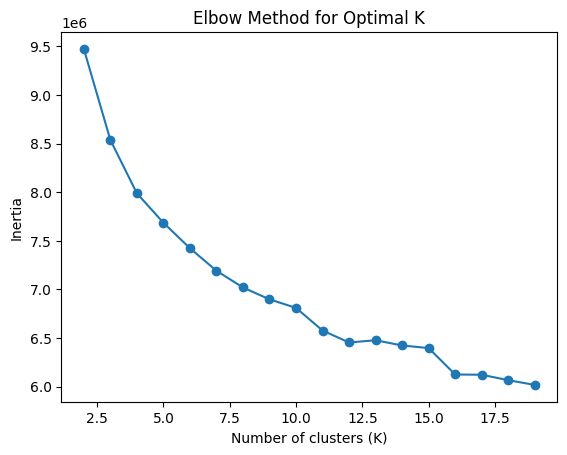

In [71]:
# Kmeans
MIN_GROUP, MAX_GROUP = 2, 20
inertia = []
K_range = range(MIN_GROUP, MAX_GROUP)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rating_df_numeric)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

## K-Means

c:\Users\Eugene\Conestoga1\2.PROG8431_DataA\DA_Proj_G7\venvPy37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


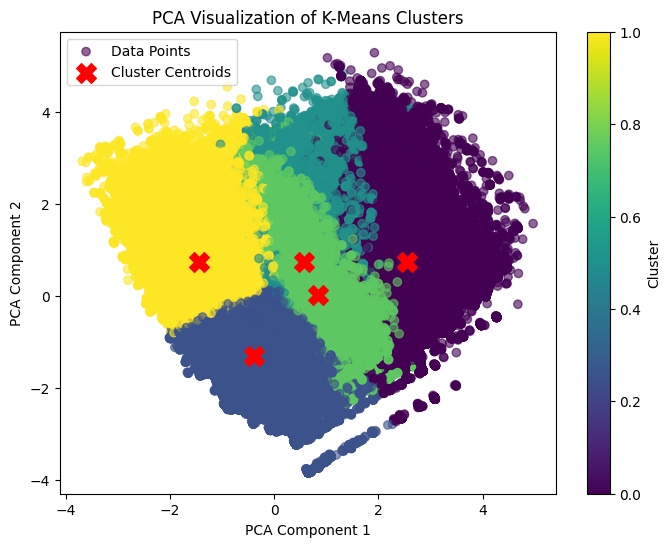

In [12]:
# Run K-Means
optimal_k = 5  # Select optimal K value by Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(rating_df_numeric)

# PCA
pca = PCA(n_components=2)
rating_df_pca = pd.DataFrame(pca.fit_transform(rating_df_numeric), columns=['PCA Component 1', 'PCA Component 2'])
kmeans_centroids_pca = pca.transform(kmeans.cluster_centers_)

# Draw scatter plots
plt.figure(figsize=(8, 6))
plt.scatter(rating_df_pca['PCA Component 1'], rating_df_pca['PCA Component 2'], c=kmeans_labels, cmap='viridis', alpha=0.6, label="Data Points")
plt.scatter(kmeans_centroids_pca[:, 0], kmeans_centroids_pca[:, 1], c='red', marker='X', s=200, label="Cluster Centroids")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of K-Means Clusters')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


WCSS (Within-Cluster Sum of Squares): 7663159.81
BCSS (Between-Cluster Sum of Squares): 3186993.90
Total Sum of Squares (TSS = WCSS + BCSS): 10850153.71


c:\Users\Eugene\Conestoga1\2.PROG8431_DataA\DA_Proj_G7\venvPy37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


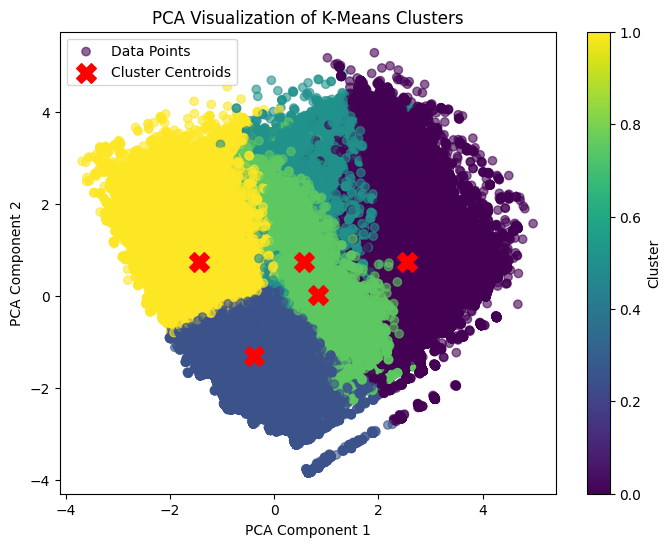

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(rating_df_numeric)

# WCSS (Within-Cluster Sum of Squares)
wcss = np.sum([np.sum((rating_df_numeric[kmeans_labels == i] - center) ** 2) 
               for i, center in enumerate(kmeans.cluster_centers_)])

# 計算 BCSS (Between-Cluster Sum of Squares)
global_mean = np.mean(rating_df_numeric, axis=0) 
bcss = np.sum([len(rating_df_numeric[kmeans_labels == i]) * np.sum((center - global_mean) ** 2)
               for i, center in enumerate(kmeans.cluster_centers_)])

# Total Sum of Squares (TSS)
tss = wcss + bcss  # TSS = WCSS + BCSS

#  WCSS & BCSS
print(f"WCSS (Within-Cluster Sum of Squares): {wcss:.2f}")
print(f"BCSS (Between-Cluster Sum of Squares): {bcss:.2f}")
print(f"Total Sum of Squares (TSS = WCSS + BCSS): {tss:.2f}")

# PCA
pca = PCA(n_components=2)
rating_df_pca = pd.DataFrame(pca.fit_transform(rating_df_numeric), columns=['PCA Component 1', 'PCA Component 2'])
kmeans_centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(rating_df_pca['PCA Component 1'], rating_df_pca['PCA Component 2'], c=kmeans_labels, cmap='viridis', alpha=0.6, label="Data Points")
plt.scatter(kmeans_centroids_pca[:, 0], kmeans_centroids_pca[:, 1], c='red', marker='X', s=200, label="Cluster Centroids")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of K-Means Clusters')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


WCSS (Within-Cluster Sum of Squares): 7988960.46
BCSS (Between-Cluster Sum of Squares): 2860547.79
Total Sum of Squares (TSS = WCSS + BCSS): 10849508.25


c:\Users\Eugene\Conestoga1\2.PROG8431_DataA\DA_Proj_G7\venvPy37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


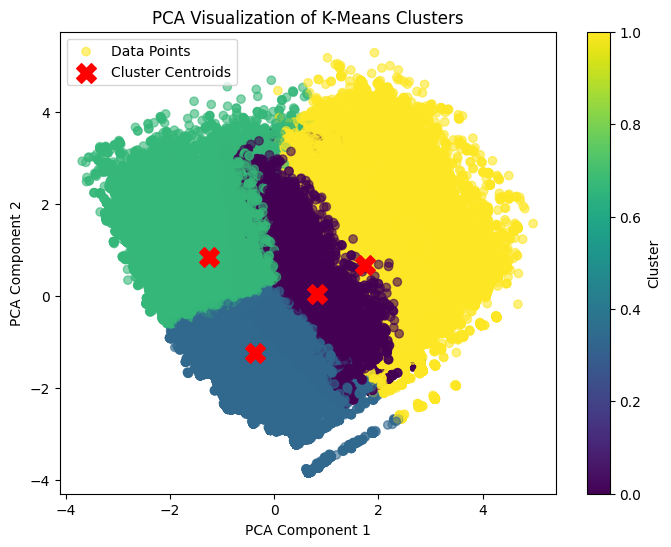

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(rating_df_numeric)

# WCSS (Within-Cluster Sum of Squares)
wcss = np.sum([np.sum((rating_df_numeric[kmeans_labels == i] - center) ** 2) 
               for i, center in enumerate(kmeans.cluster_centers_)])

# 計算 BCSS (Between-Cluster Sum of Squares)
global_mean = np.mean(rating_df_numeric, axis=0) 
bcss = np.sum([len(rating_df_numeric[kmeans_labels == i]) * np.sum((center - global_mean) ** 2)
               for i, center in enumerate(kmeans.cluster_centers_)])

# Total Sum of Squares (TSS)
tss = wcss + bcss  # TSS = WCSS + BCSS

#  WCSS & BCSS
print(f"WCSS (Within-Cluster Sum of Squares): {wcss:.2f}")
print(f"BCSS (Between-Cluster Sum of Squares): {bcss:.2f}")
print(f"Total Sum of Squares (TSS = WCSS + BCSS): {tss:.2f}")

# PCA
pca = PCA(n_components=2)
rating_df_pca = pd.DataFrame(pca.fit_transform(rating_df_numeric), columns=['PCA Component 1', 'PCA Component 2'])
kmeans_centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(rating_df_pca['PCA Component 1'], rating_df_pca['PCA Component 2'], c=kmeans_labels, cmap='viridis', alpha=0.6, label="Data Points")
plt.scatter(kmeans_centroids_pca[:, 0], kmeans_centroids_pca[:, 1], c='red', marker='X', s=200, label="Cluster Centroids")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of K-Means Clusters')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(rating_df_numeric)

# WCSS (Within-Cluster Sum of Squares)
wcss = np.sum([np.sum((rating_df_numeric[kmeans_labels == i] - center) ** 2) 
               for i, center in enumerate(kmeans.cluster_centers_)])

# 計算 BCSS (Between-Cluster Sum of Squares)
global_mean = np.mean(rating_df_numeric, axis=0) 
bcss = np.sum([len(rating_df_numeric[kmeans_labels == i]) * np.sum((center - global_mean) ** 2)
               for i, center in enumerate(kmeans.cluster_centers_)])

# Total Sum of Squares (TSS)
tss = wcss + bcss  # TSS = WCSS + BCSS

#  WCSS & BCSS
print(f"WCSS (Within-Cluster Sum of Squares): {wcss:.2f}")
print(f"BCSS (Between-Cluster Sum of Squares): {bcss:.2f}")
print(f"Total Sum of Squares (TSS = WCSS + BCSS): {tss:.2f}")

# PCA
pca = PCA(n_components=2)
rating_df_pca = pd.DataFrame(pca.fit_transform(rating_df_numeric), columns=['PCA Component 1', 'PCA Component 2'])
kmeans_centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(rating_df_pca['PCA Component 1'], rating_df_pca['PCA Component 2'], c=kmeans_labels, cmap='viridis', alpha=0.6, label="Data Points")
plt.scatter(kmeans_centroids_pca[:, 0], kmeans_centroids_pca[:, 1], c='red', marker='X', s=200, label="Cluster Centroids")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of K-Means Clusters')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


WCSS (Within-Cluster Sum of Squares): 8537785.09
BCSS (Between-Cluster Sum of Squares): 2312357.77
Total Sum of Squares (TSS = WCSS + BCSS): 10850142.86


c:\Users\Eugene\Conestoga1\2.PROG8431_DataA\DA_Proj_G7\venvPy37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


## Summary

The K-Means algorithm divided our numerical data into the five clusters, each representing distinct patterns in hotel services and ratings. Using Principal Component Analysis (PCA) to reduce dimensionality, we can see a clear separation between clusters, which suggests meaningful differences across the features we considered. For example, some clusters represent high-rated hotels that offer a wide range of services, while others include budget-friendly options, helping us identify key segments within the hotel market for targeted strategies.

# References
* Radojevic, T., Stanisic, N., & Stanic, N. (2017). Inside the rating scores: A multilevel analysis of the factors influencing customer satisfaction in the hotel industry. Cornell Hospitality Quarterly, 58(2), 134-164.​
* Hofstede, G. (2010). Hofstede Dimension Data Matrix. Retrieved from http://www.geerthofstede.nl/dimension-data-matrix ​
* Radojevic, T., Stanisic, N., & Stanic, N. (2016), Inside the Rating Scores: A Multilevel Analysis of the Factors Influencing Customer Satisfaction in the Hotel Industry., Mendeley Data, v1 http://dx.doi.org/10.17632/kwsrxshf9x.1